<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projeto Proposto 
</h1>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto baseia-se no Estudo das Técnicas de Machine Learning - Classifiacação. </i>       
</p>  

# <font color='red' style='font-size: 40px;'>Library and Data </font>

In [1]:
import pandas as pd 
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import time
import datetime
import plotly.express as px 
import plotly.graph_objects as go
import warnings



%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore') # Remove Warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# <font color='red' style='font-size: 40px;'>1.0 Introdução a Classificação  </font>

## 1.1) O que é um Algoritmo de Classificação?

<img src = './img1.png' width = '70%'>

<img src="./img9.png" width="700">

## 1.2) Como analisar o desempenho de um Modelo de Classificação?

### 1. Matriz de Confusão:

<img src="./img8.png" width="700">

<img src="./img10.png" width="700">

> **A matriz de confusão é a matriz quadrada em que se compara os verdadeiros valores de uma classificação com os valores preditos através de algum modelo. Sua diagonal é composta pelos acertos do modelo e os demais valores são os erros cometidos.**

> 1. Verdadeiro Negativo (VN): são as observações que o modelo previu como negativas e realmente eram negativas, ou seja, o modelo classificou corretamente. Por exemplo, a pessoa não está grávida e o modelo conseguiu identificar corretamente.

> 2. Falso Positivo (FP): são as observações que o modelo previu como positivas, mas na realidade eram negativas. Ou seja, o modelo estimou errado a classe que temos interesse em estimar. Por exemplo, a pessoa não está grávida e o modelo prevê como grávida.

> 3. Falso Negativo (FN): são as observações que o modelo identificou como negativas, mas eram positivas. Ou seja, as observações que o modelo estimou errado . Por exemplo, a pessoa está grávida e o modelo classifica como não grávida.

> 4. Verdadeiro Positivo: são as observações que são positiva e o modelo consegue classificar corretamente. Ou seja, as observações, da classe de interesse, que o modelo classificou corretamente. Por exemplo, a pessoa está grávida e o modelo consegue classificar como grávida.

## 1.3) Como analisar o desempenho de um Modelo de Classificação?

CONSULTAR: 

https://medium.com/turing-talks/turing-talks-10-introdu%C3%A7%C3%A3o-%C3%A0-predi%C3%A7%C3%A3o-a75cd61c268d

https://vitorborbarodrigues.medium.com/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c#:~:text=Precis%C3%A3o%3A%20dentre%20todas%20as%20classifica%C3%A7%C3%B5es,harm%C3%B4nica%20entre%20precis%C3%A3o%20e%20recall.

### 1) Matriz de Confusão:

<img src="./img43.png" width="700">


> **A matriz de confusão é a matriz quadrada em que se compara os verdadeiros valores de uma classificação com os valores preditos através de algum modelo. Sua diagonal é composta pelos acertos do modelo e os demais valores são os erros cometidos.**

> 1. Verdadeiro Negativo (VN): são as observações que o modelo previu como negativas e realmente eram negativas, ou seja, o modelo classificou corretamente. Por exemplo, a pessoa não está grávida e o modelo conseguiu identificar corretamente.

> 2. Falso Positivo (FP): são as observações que o modelo previu como positivas, mas na realidade eram negativas. Ou seja, o modelo estimou errado a classe que temos interesse em estimar. Por exemplo, a pessoa não está grávida e o modelo prevê como grávida.

> 3. Falso Negativo (FN): são as observações que o modelo identificou como negativas, mas eram positivas. Ou seja, as observações que o modelo estimou errado . Por exemplo, a pessoa está grávida e o modelo classifica como não grávida.

> 4. Verdadeiro Positivo: são as observações que são positiva e o modelo consegue classificar corretamente. Ou seja, as observações, da classe de interesse, que o modelo classificou corretamente. Por exemplo, a pessoa está grávida e o modelo consegue classificar como grávida.

### 2) Métricas de Avaliação Derivadas da Matriz de Confusão

<img src="./img11.png" width="700">

#### 1. Acurácia:

> Acurácia indica uma performance geral do modelo. **Dentre todas as classificações, quantas o modelo classificou corretamente**. Ótima métrica para utilizar quando os dados estão balanceados, vai dar uma visão geral do quanto o modelo está identificando as classes corretamente.
    
> Porém, não devemos utilizar a acurácia, quando temos classes desbalanceadas, causa uma falsa impressão de bom desempenho.

> Por exemplo: considere um estudo em que apenas 5% da população apresenta uma determinada doença. Logo, temos um conjunto de dados desbalanceado.
    
> Se o modelo escolhido conseguir classificar corretamente todas as pessoas que não tem a doença e errar a classificação de todos os doentes, teremos uma acurácia de 95%. Dando uma falsa impressão que o modelo treinado tem uma ótima previsão. Porém, o modelo não consegue classificar corretamente a classe de interesse.

<img src="./metricas12.png" width="700">

#### 2. Valor Predito Negativo:

> Valor Preditivo Negativo (VPN) é a métrica que traz a informação da quantidade de observações classificadas como negativa (0) que realmente são negativa. **Ou seja, entre todas as observações prevista como negativa (0), quantas foram identificadas corretamente** ou **dentre todas as classificações de classe Negativo que o modelo fez, quantas estão corretas**.

> Por exemplo: entre os pacientes classificados como não doentes, quantos foram identificados corretamente. 

<img src="./metricas13.png" width="700">

#### 3. Valor Preditivo Positivo/Precision:

> Precision ou precisão, também conhecida como Valor Preditivo Positivo (VPP), é a métrica que traz a informação da quantidade de observações classificadas como positiva (1) que realmente são positiva. **Ou seja, entre todas as observações identificadas como positivas (1), quantas foram identificadas corretamente** ou **dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas**.

> Por exemplo: entre os pacientes classificados como doentes, quantos foram identificados corretamente.


<img src="./metricas14.png" width="700">

#### 4. Sensibilidade/Recall:

> Recall ou Sensibilidade é a proporção dos Verdadeiros Positivos entre todas as observações que realmente são positivas no seu conjunto de dados.  **Ou seja, entre todas as observações que são positivas quantas o modelo conseguiu identificar como positiva** ou **dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas**. **Representa a capacidade de um modelo em prever a classe positiva**.

> Por exemplo: dentre todos os pacientes doentes, quantos pacientes o modelo conseguiu identificar corretamente.

<img src="./metricas15.png" width="700">

#### 5. Especificade:

> Especificidade é a proporção dos Verdadeiros Negativos entre todas as observações que realmente são negativas no seu conjunto de dados.  **Ou seja, entre todas as observações que são negativas, quantas o modelo conseguiu prever como negativa** ou **dentre todas as situações de classe Negativo como valor esperado, quantas estão corretas**. **Representa a capacidade de um modelo em prever a classe negativa**.

> Por exemplo: dentre todos os pacientes  não doentes, quantos foram classificados corretamente.

<img src="./metricas16.png" width="700">


#### 6. Área sob a Curva ROC:


> A curva ROC oferece uma visão geral de um classificador e pode ser utilizada para encontrar pontos de corte ideias. O corte que deixa a curva mais próxima do vértice (0, 1) maximiza a sensibilidade conjuntamente com a especificidade, ou seja, quanto mais distante da curva diagonal, melhor!

> Uma medida decorrente da curva ROC é o AUC (Area Under the Curve), que nada mais é que a área abaixo da curva. O AUC varia entre 0 e 1 e quanto maior o AUC melhor o modelo.

> Utilizada quando temos classes desbalanceada e sua principal vantagem é poder escolher o melhor ponto de corte para otimizar o desempenho do modelo.

<img src="./img44.png" width="70%">
<img src="./img45.png" width="70%">

> Todas essa métricas variam no intervalo [0,1] e quanto mais próximos de 1, melhor é o modelo.

<img src="./img51.png" width="70%">
<img src="./img52.png" width="70%">
<img src="./img53.png" width="70%">

> Por convenção estatística, podemos adotar:
    
* Área < 0.7 --> Baixa Discriminação
* 0.7 <= Área < 0.8 --> Discriminação Aceitável
* 0.8 <= Área < 0.9 --> Discriminação Excelente
* 0.9 < Área --> Discriminação Excepcional

#### 8. Para se lembrar das semelhanças:

> **1. Acurácia**

> **2. Valor Preditivo Negativo x Precision**

> **3. Recall x Especifidade x F1-Score**

> **4. Área sob a Curva ROC**

#### 9. Quando utilizar cada uma

<img src="./bot2.png" width="70%">


## 1.4) Principais Algoritmos de Classificação 

<img src="./img12.png" width="700">

## 1.5) O que é Overfitting e Underfitting?

### 1. Definição

> **Overfit: Modelo ruim e enviesado.**

> **Underfit: Modelo ruim e com baixa acurácia.**

<img src = 'img6.png' width = 200%>

### 2. Causas:
    
> 1. Dados não representativos (que não tem relação)

> 2. Dados não significativos (poucos)

> 3. Forma de treinamento

> 4. Classe rara (O modelo pode ter dificuldade de aprender uma classe rara, portanto, a solução é a estratificação para melhorar o modelo. Ex: Transações de Fraude)

> 5. Modelo incorreto

### 3. Boas Práticas:

> 1. Antes de realizar qualquer manipulação, deve-se separar os dados em Treino e Teste para evitar Data Lakage.

> 2. A separação deve ser feita de maneira aleatória para evitar viés.

## 1.6) Bias-Variance Tradeoff 

### 1. Bias e Variance

> 1. O objetivo dos modelos de Machine Learning é estimar a função que melhor ajusta aos dados de entrada para obter previsões corretas de forma generalizada. A melhor maneira de medir e otimizar o desempenho do modelo é levar em consideração o viés e a variação resultante.

> 2. Bias (ou viés em português): é o erro devido à diferença entre as previsões médias e os valores corretos que estamos tentando prever, quando treinamos um modelo, geralmente repetimos o processo de treinamento n vezes e cada vez que o modelo é treinado, um novo modelo é criado e pela aleatoriedade dos dados, consequentemente teremos uma variedade de previsões, então o Bias ou Viés é a distância, em geral, das previsões para o valor correto.

> 3. Variance (ou variância em português): é o erro devido à variabilidade de uma previsão do modelo para um determinado ponto de dados. Repetindo novamente o treinamento, a variância mede o quanto as previsões do modelo variam entre diferentes realizações do modelo.

<img src = './metricas24.png' width = '70%'>


### 2. Bias-Variance Tradeoff

> 1. Entendimento dos Tradeoffs: 

- Baixo Bias e e Baixa Variance: É o modelo ideal e o que desejamos obter, com uma boa acurácia e precisão nas previsões. Ele significa que temos baixo erro em dados de treino e baixo erro em dados de teste.

- Baixo Bias e Alta Variance: O modelo está superestimando (overfitting) nos dados de treino e não generaliza bem com dados novos. Ele significa que temos baixo erro em dados de treino e alto erro em dados de teste.

- Alto Bias e Baixa Variance: O modelo está subestimando (underfitting) nos dados de treino e não captura a relação verdadeira entre as variáveis preditoras e a variável resposta. Ele significa que temos alto erros em dados de treino e em dados de teste.

- Alto Bias e Alta Variance: O modelo está inconsistente e com um acurácia muito baixa nas previsões. Ele significa que temos altos erros em dados de treino e erros ainda maiores em dados de teste.

> 2. Como realizar um bom Tradeoff? 

<img src = './metricas26.png' width = '70%'>
<img src = './metricas27.png' width = '70%'>

### 3. Como encontrar o ajuste correto? 

> 1. Bagging e outras técnicas de reamostragem podem ser usadas para reduzir a variação nas previsões do modelo.

> 2. Usar mais dados no treinamento também ajuda, para aumentar a aprendizagem do modelo para os padrões existentes.

> 3. Encontrar o equilíbrio entre o Viés e Variância é um processo iterativo, treinando o modelo várias vezes com diferentes combinações de features, hiperparâmetros e com diferentes conjuntos de dados para treinamento.

> 4. Reduzir o Viés e a Variância é vital para um modelo robusto e de alto desempenho preditivo.

# <font color='red' style='font-size: 40px;'>2.0 Etapas de Pré-Modelagem de Machine Learning para Classificação   </font>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto em como objetivo desenvolver um Algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver algum tipo de doenla cardíaca com base em alguns fatores clínicos e laboratoriais de referência. </i>       
</p>  

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1


## 2.1) Contexto

### Definição do Problema de Negócio

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Explicação das Features


> 1. Age: age of the patient [years]

> 2. Sex: sex of the patient [M: Male, F: Female]

> 3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

> 4. RestingBP: resting blood pressure [mm Hg]

> 5. Cholesterol: serum cholesterol [mm/dl]

> 6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

> 7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

> 8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

> 9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

> 10. Oldpeak: oldpeak = ST [Numeric value measured in depression]

> 11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

> 12. HeartDisease: output class [1: heart disease, 0: Normal]


### Glossário

> 1. AGE é a idade de cada paciente

> 2. Sex é o sexo de cada paciente

> 3. ChestPainType é o tipo de dor no peito (Angina é dor no peito causada pela diminuição no fluxo de sangue no coração)

    - ASY: Assintomático
    - NAP: Dor não Anginosa
    - ATA: Angina Atípica
    - TA: Angina Típica

> 4. RestingBP é a pressão sanguínea em repouso (mmHg)

> 5. Cholesterol é a concentração de Colesterol

> 6. Fasting BS é a concentração de aç~ucar no sangue em Jejum (mg/dl). Fasting BS < 120 mg/dl (não diabético), Fasting BS > 120 mg/dl (diabético).

> 7. Resting ECG é o eletrocardiograma em repouso

    - Normal: Normal
    - LVH: Hipertrofria Ventricular Esquerda
    - ST: Anormalidade da onda ST-T

> 8. Max HR é a máxima frequência cardíaca 

> 9. Exercise Angina é a dor no Peito induzida por exercício

> 10. Oldpeak é a Depressão de ST(Referência ao ECG) induzida por exercício em relação ao repouso

> 11. ST_Slope é a inclinação do segmento ST no ECG

    - Flat = plano

    - Up = para cima

    - Down = para baixo 

> 12. HeartDiease é a classificação para ter ou não doença cardíaca. 



## 2.2) Análise Exploratória dos Dados 

### Importação 

In [80]:
dados = pd.read_csv('heart.csv', sep = ',', encoding='iso-8859-1')
print(dados.shape)
dados.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0000,Up,0


 ### Análise de Variáveis 



* Tipo de Variáveis 

In [81]:
 dados.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

> 1. Variáveis Categóricas Nominais: Sex, ExerciseAngina,  ChestPainType, HeartDisease

> 2. Variáveis Categórias Ordinais: FastingBS, RestingECG, ST_Slope

> 3. Variáveis Quantiativas Discretas: Age

> 4. Variáveis Quantitativas Contínuas: RestingBP, Cholesterol, , MaxHR, Oldpeak

* Age: Analisando a Distribuição das Idades 

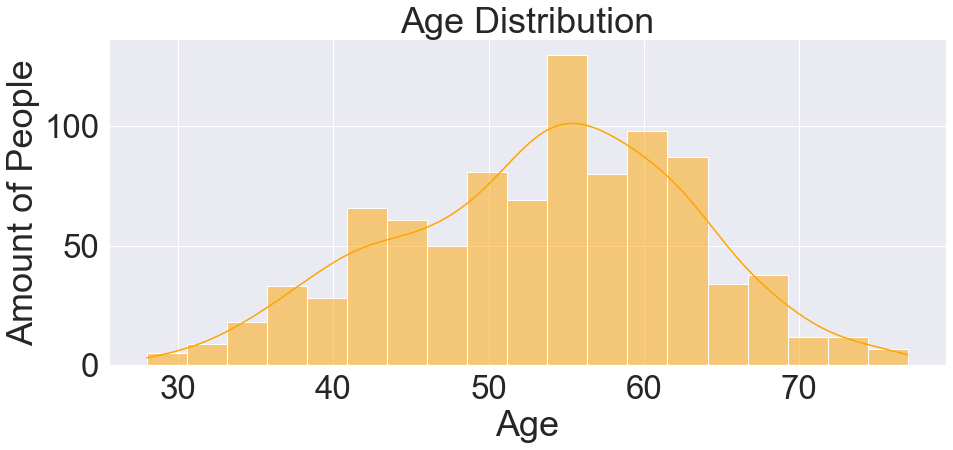

In [82]:
sns.histplot(dados['Age'], kde = True, color = 'orange', stat='count')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Amount of People')
plt.show()

> 1. A maioria das pessoas está concentrada entre 50 a 65 anos. 

* Sex: Analisando a Distribuição de Sexo  

M   0.7898
F   0.2102
Name: Sex, dtype: float64

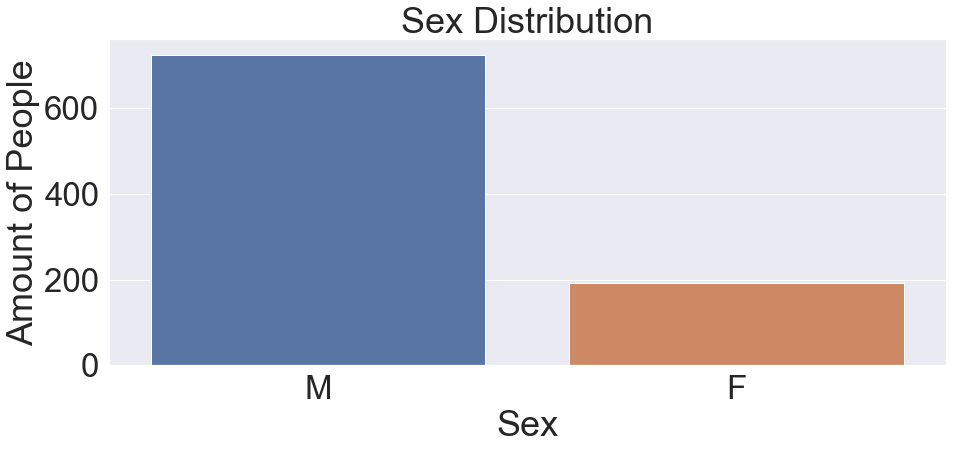

In [83]:
display(dados['Sex'].value_counts(normalize=True))
sns.countplot(x = dados['Sex'])
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Amount of People')
plt.show()

> 1. Existem mais pessoas do Sexo Masculino que Feminino.

* ChestPainType: Analisando o Tipo de Dor no Peito 

ASY   0.5403
NAP   0.2211
ATA   0.1885
TA    0.0501
Name: ChestPainType, dtype: float64

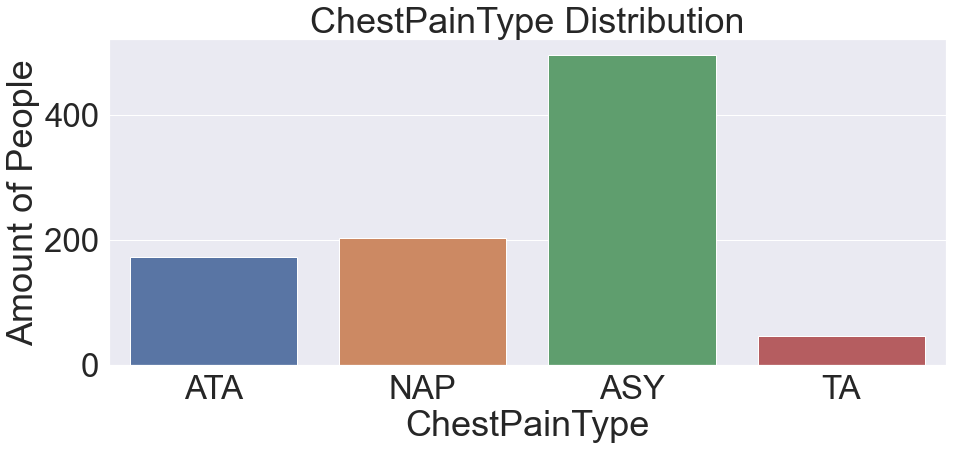

In [84]:
display(dados['ChestPainType'].value_counts(normalize=True))
sns.countplot(x = dados['ChestPainType'])
plt.title('ChestPainType Distribution')
plt.xlabel('ChestPainType')
plt.ylabel('Amount of People')
plt.show()

> 1. A maior parte das pessoas possuem Dor no Peito Assintomática. 

* RestingBP: Analisando a Pressão Sanguínea 

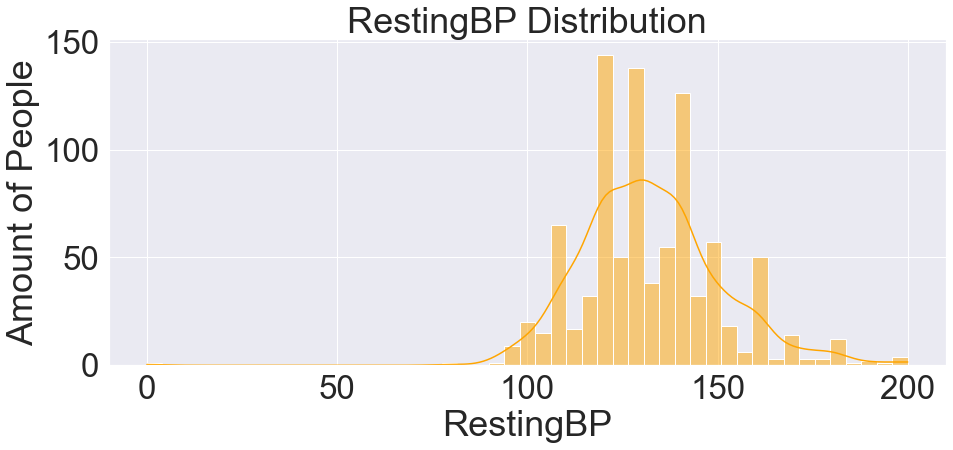

In [85]:
sns.histplot(dados['RestingBP'], kde = True, color = 'orange', stat='count')
plt.title('RestingBP Distribution')
plt.xlabel('RestingBP')
plt.ylabel('Amount of People')
plt.show()

> 1. Existem Outliers em relação as pressões. Quem está fora do Intervalo 100 - 175 provavelmente é um Outlier. 


* Cholesterol: Analisando a Concentração de Colesterol 

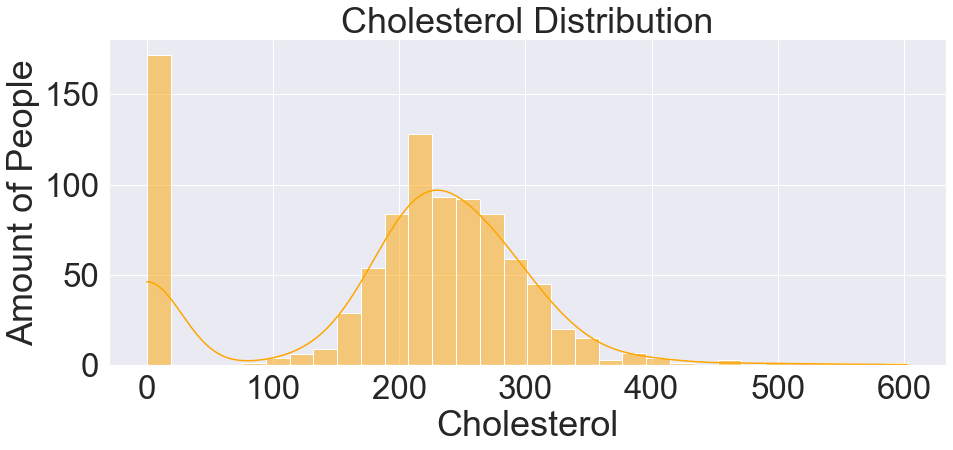

In [86]:
sns.histplot(dados['Cholesterol'], kde = True, color = 'orange', stat='count')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Amount of People')
plt.show()

> 1. Aqui também existem Outliers, pois todos temos colesterol no sangue, mesmo que pouco. 

* FastingBS: Analisando a Concentração de Açúcar no sangue 

0   0.7669
1   0.2331
Name: FastingBS, dtype: float64

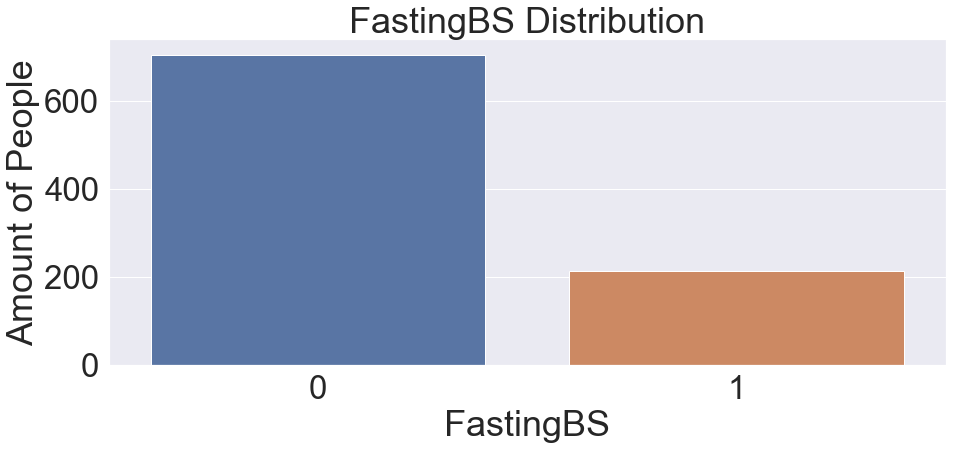

In [87]:
display(dados['FastingBS'].value_counts(normalize=True))
sns.countplot(x = dados['FastingBS'])
plt.title('FastingBS Distribution')
plt.xlabel('FastingBS')
plt.ylabel('Amount of People')
plt.show()

> 1. A maioria das pessoas possui classificação 0 (menor do que 120 mg/dl, ou seja, não diabético)

* RestingECG: Análise do Eletrocardiograma em repouso 

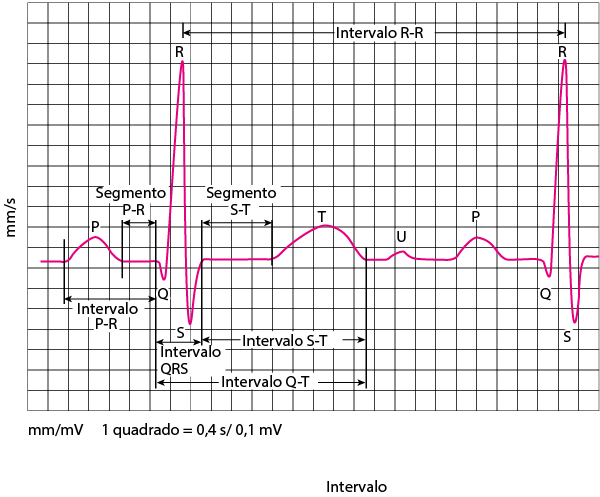

**SEGMENTO ST:** Qualquer desnível do
segmento ST, para cima (supradesnível) ou para baixo
(infradesnível), deve ser avaliado pois pode corresponder a um
infarto agudo do miocárdio.

Normal   0.6013
LVH      0.2048
ST       0.1939
Name: RestingECG, dtype: float64

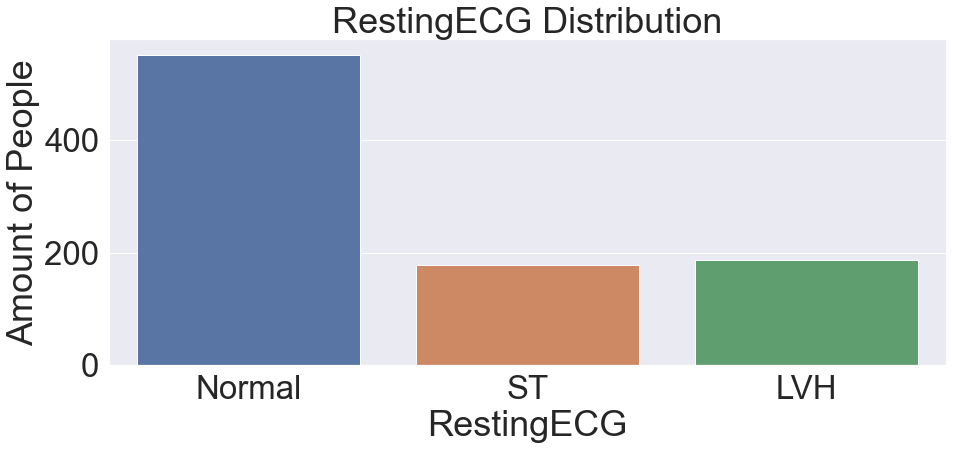

In [88]:
display(dados['RestingECG'].value_counts(normalize=True))
sns.countplot(x = dados['RestingECG'])
plt.title('RestingECG Distribution')
plt.xlabel('RestingECG')
plt.ylabel('Amount of People')
plt.show()

> 1. A maioria das pessoas está com diagnóstico normal, contudo, temos 19% das pessoas com Anormalidade da onda ST-T e 20% das pessoas com Hipertrofria Venricular Esquerda. 

* MaxHR: Anáise da Frequência Cardíaca Máxima 

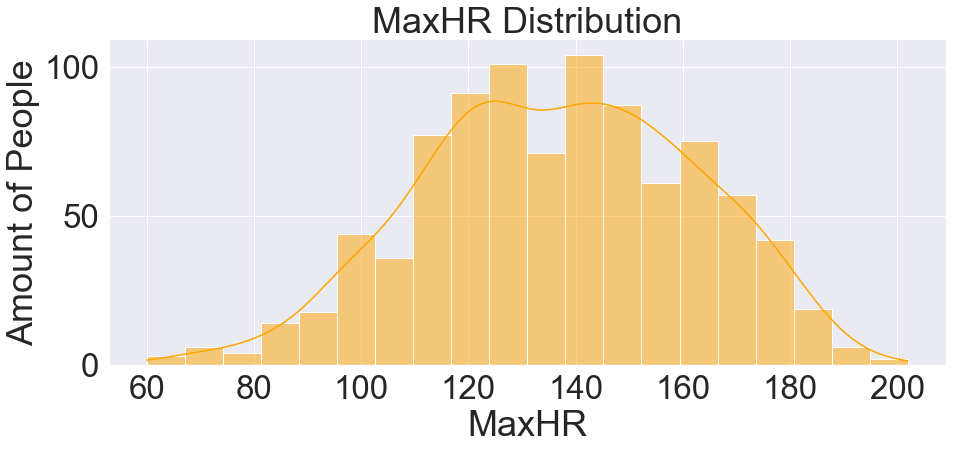

In [89]:
sns.histplot(dados['MaxHR'], kde = True, color = 'orange', stat='count')
plt.title('MaxHR Distribution')
plt.xlabel('MaxHR')
plt.ylabel('Amount of People')
plt.show()

> 1. Aparentemente os batimentos cardíacos estão normais. 

* Exercise Angina: Análise da Angina induzida por exercício 

N   0.5959
Y   0.4041
Name: ExerciseAngina, dtype: float64

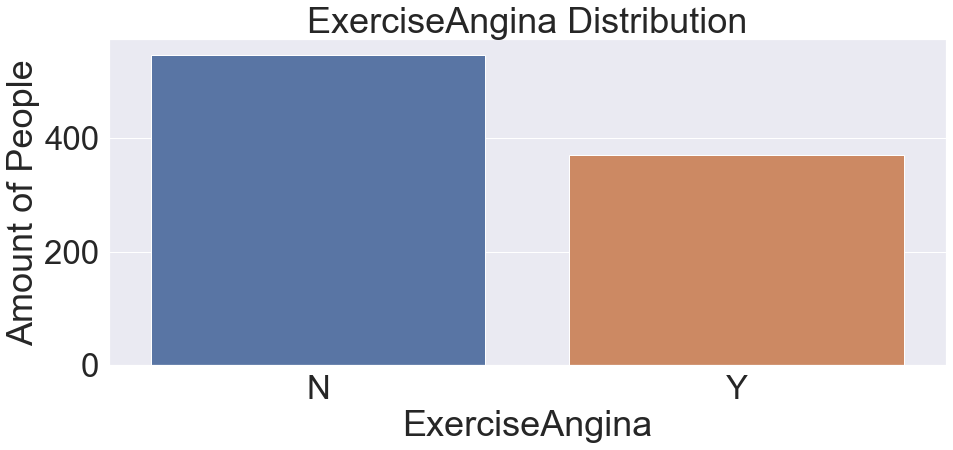

In [90]:
display(dados['ExerciseAngina'].value_counts(normalize=True))
sns.countplot(x = dados['ExerciseAngina'])
plt.title('ExerciseAngina Distribution')
plt.xlabel('ExerciseAngina')
plt.ylabel('Amount of People')
plt.show()

> 1. 40% das pessoas teve dor no peito induzidas por exercícios físicos. 

* Old Peak: Análise da Depressão de ST (Referência ao ECG) induzida por exercício em relação ao repouso

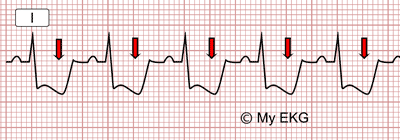

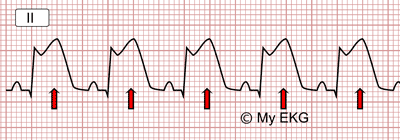

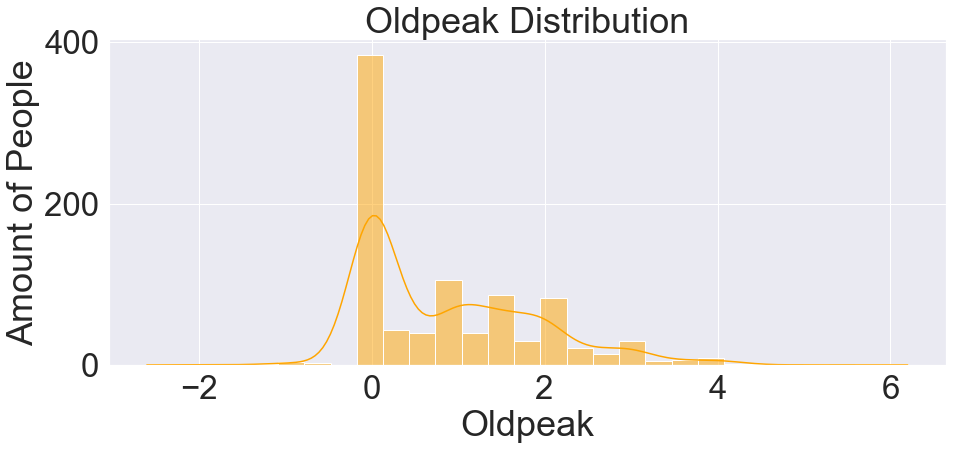

In [91]:
sns.histplot(dados['Oldpeak'], kde = True, color = 'orange', stat='count')
plt.title('Oldpeak Distribution')
plt.xlabel('Oldpeak')
plt.ylabel('Amount of People')
plt.show()

* ST_Slope: Inclinação do Segmento ST no ECG

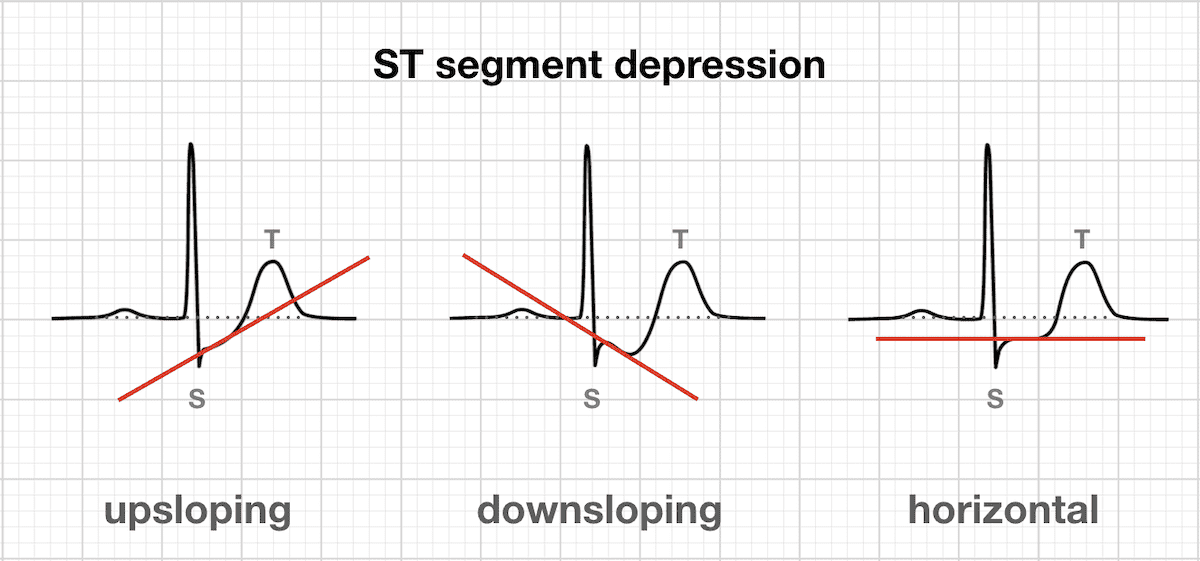

Flat = plano

Up = para cima

Down = para baixo 

Flat   0.5011
Up     0.4303
Down   0.0686
Name: ST_Slope, dtype: float64

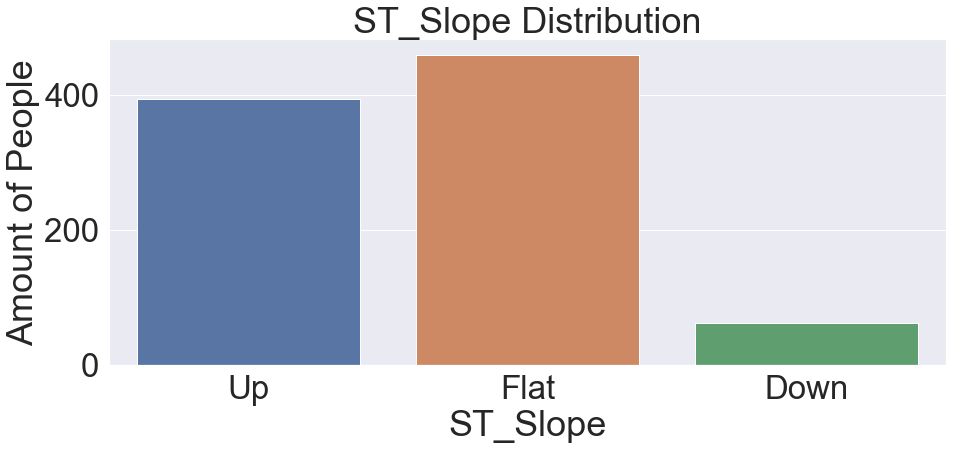

In [92]:
display(dados['ST_Slope'].value_counts(normalize=True))
sns.countplot(x = dados['ST_Slope'])
plt.title('ST_Slope Distribution')
plt.xlabel('ST_Slope')
plt.ylabel('Amount of People')
plt.show()

* Heart Disease: Doença Cardíaca 

1   0.5534
0   0.4466
Name: HeartDisease, dtype: float64

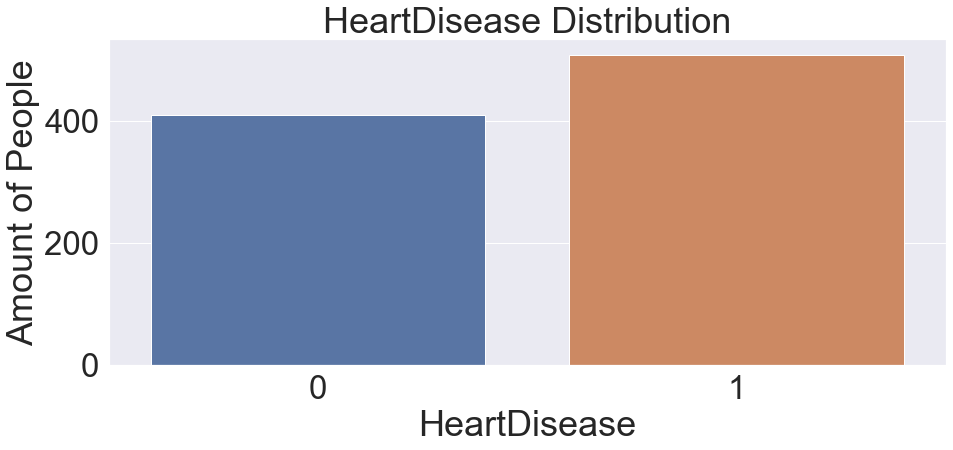

In [93]:
display(dados['HeartDisease'].value_counts(normalize=True))
sns.countplot(x = dados['HeartDisease'])
plt.title('HeartDisease Distribution')
plt.xlabel('HeartDisease')
plt.ylabel('Amount of People')
plt.show()

> 1. A maioria das pessoas possui doença cardíaca. 

## 2.3) Tratamento e Manipulação dos Dados 

### Valores Missing

In [94]:
dados.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Análise Estatística Descritiva 

In [95]:
dados.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.0000,918.0000,918.0000,918.0000,918.0000,918.0000,918.0000
mean,53.5109,132.3965,198.7996,0.2331,136.8094,0.8874,0.5534
std,9.4326,18.5142,109.3841,0.4230,25.4603,1.0666,0.4974
min,28.0000,0.0000,0.0000,0.0000,60.0000,-2.6000,0.0000
25%,47.0000,120.0000,173.2500,0.0000,120.0000,0.0000,0.0000
50%,54.0000,130.0000,223.0000,0.0000,138.0000,0.6000,1.0000
75%,60.0000,140.0000,267.0000,0.0000,156.0000,1.5000,1.0000
max,77.0000,200.0000,603.0000,1.0000,202.0000,6.2000,1.0000


In [96]:
print(f'Valores com Pressão = 0 : {dados.loc[dados.RestingBP!= 0].shape[0]}')
dados = dados.loc[dados.RestingBP!= 0]

Valores com Pressão = 0 : 917


In [97]:
print(f'Valores com Colesterol = 0: {dados.loc[dados.Cholesterol!= 0].shape[0]}')
dados.Cholesterol.replace(0, dados.Cholesterol.median(), inplace = True)

Valores com Colesterol = 0: 746


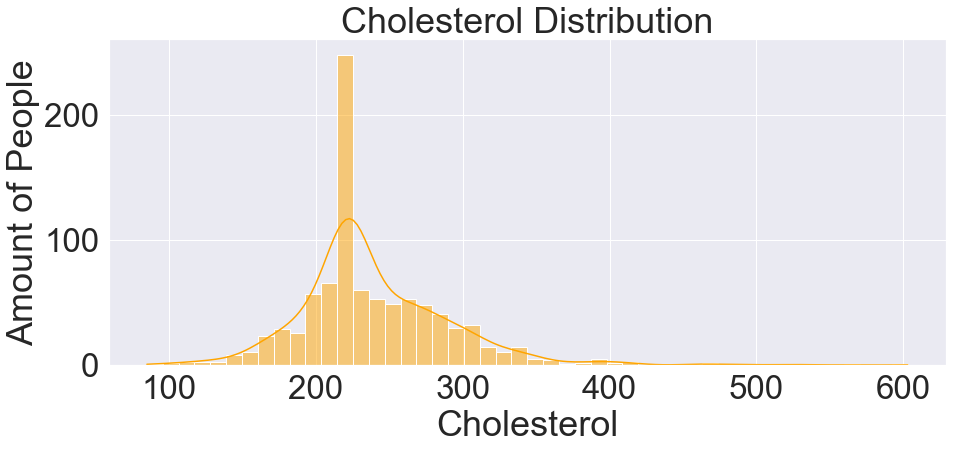

In [98]:
sns.histplot(dados['Cholesterol'], kde = True, color = 'orange', stat='count')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Amount of People')
plt.show()

> 1. Substituiu-se pela Mediana pois é uma variável quantitativa contínua

### Análise de Outliers 

* Age 

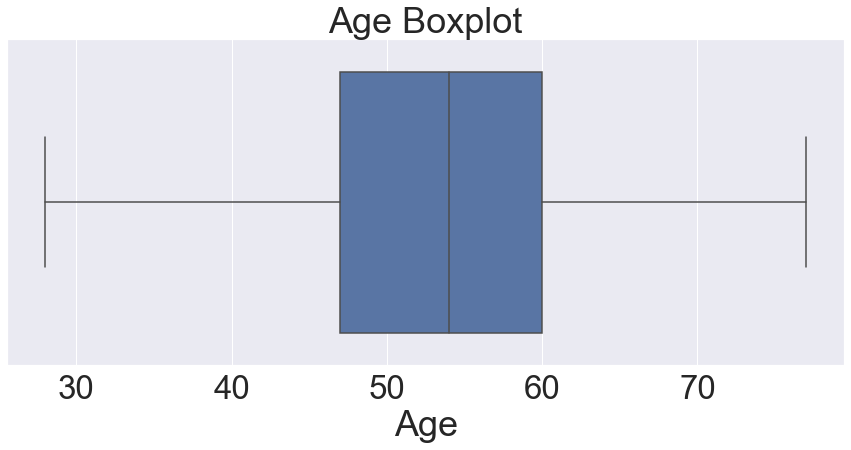

In [99]:
sns.boxplot(x = dados['Age'])
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.show()

> 1. Não encontrou-se Outliers na feature Age 

* RestingBP 

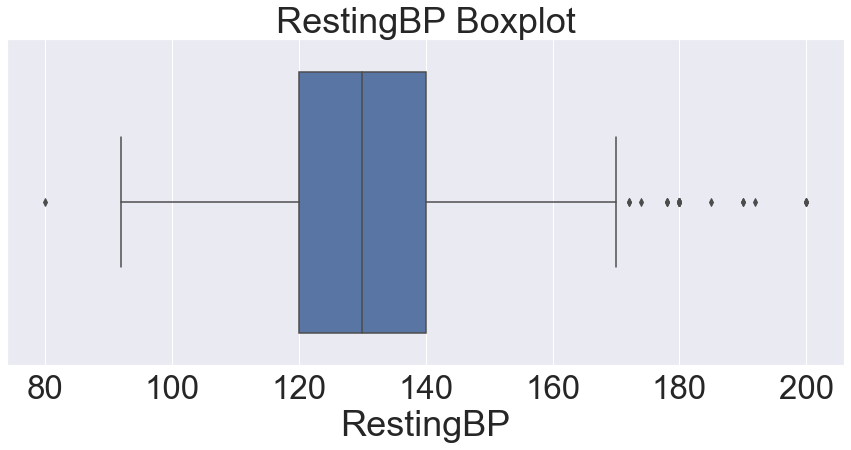

In [100]:
sns.boxplot(x = dados['RestingBP'])
plt.title('RestingBP Boxplot')
plt.xlabel('RestingBP')
plt.show()

> 1. Nesse caso há Outliers, contudo, para este caso faz sentindo deixarmos, pois altas pressões podem significar problemas cardíacos. 

* Cholesterol 

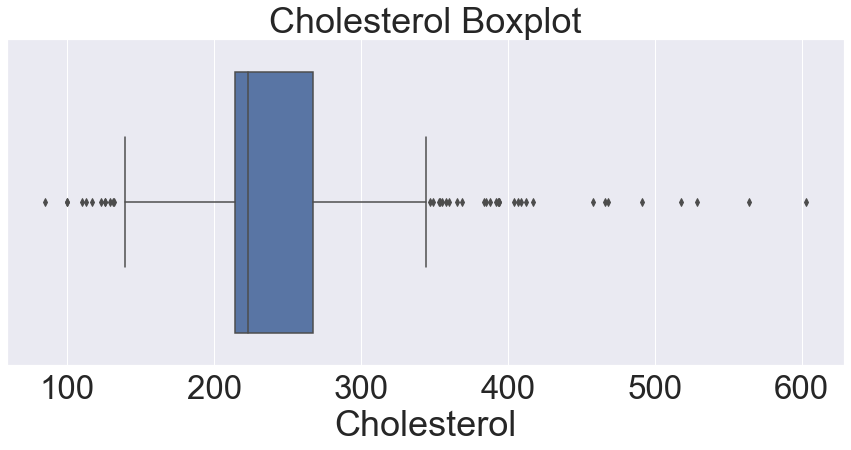

In [101]:
sns.boxplot(x = dados['Cholesterol'])
plt.title('Cholesterol Boxplot')
plt.xlabel('Cholesterol')
plt.show()

> 1. Nesse caso há Outliers, contudo, para este caso faz sentindo deixarmos, pois colesterol alto pode significar problemas cardíacos. 

* MaxHR 

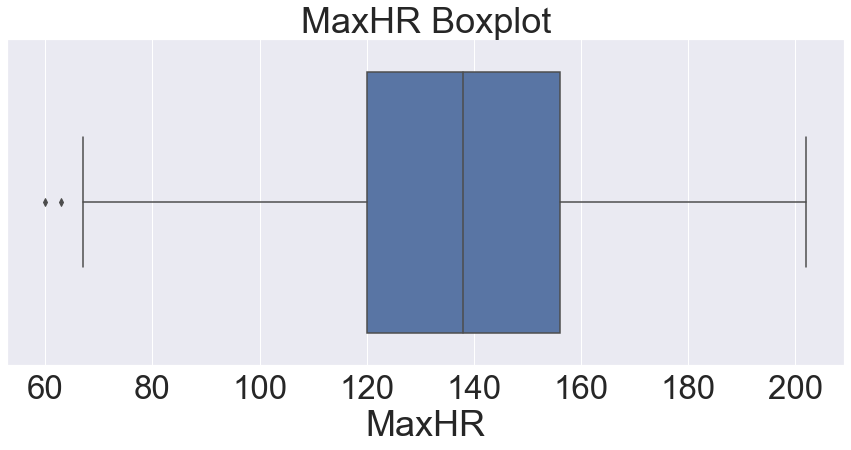

In [102]:
sns.boxplot(x = dados['MaxHR'])
plt.title('MaxHR Boxplot')
plt.xlabel('MaxHR')
plt.show()

In [103]:
dados.to_csv('heart_tratado.csv', sep = ';', encoding = 'utf-8', index = False)

## 2.4) Pré-Processamento dos Dados 

In [104]:
dados = pd.read_csv('heart_tratado.csv', sep = ';')
df = dados.copy()
print(df.shape)
df.head()

(917, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0000,Up,0


### Pré-Processamento de Variáveis - Variáveis Previsoras e Variável Alvo 

In [105]:
x = df.iloc[:, 0:11].values 
y = df.iloc[:, 11].values

### Pré-Processamento de Variáveis Categóricas - Label Encoding 

In [106]:
# Na Mão
df_label_encoding_mao = df.copy()

df_label_encoding_mao['Sex'].replace({'M':0, 'F':1}, inplace = True)
df_label_encoding_mao['ChestPainType'].replace({'TA':0, 'ATA':1, 'NAP':2, 'ASY':3}, inplace = True)
df_label_encoding_mao['RestingECG'].replace({'Normal':0, 'ST':1, 'LVH':2}, inplace = True)
df_label_encoding_mao['ExerciseAngina'].replace({'N':0, 'Y':1}, inplace = True)
df_label_encoding_mao['ST_Slope'].replace({'Up':0, 'Flat':1, 'Down':2}, inplace = True)
print('Na Mão')
x_label_encoding_mao = df_label_encoding_mao.iloc[:, :-1].values
print(x_label_encoding_mao[:10, :])
print()

# Utilizando Bibliotecas
from sklearn.preprocessing import LabelEncoder

df_label_encoding_biblioteca = df.copy()

x_label_encoding_bibilioteca = df_label_encoding_biblioteca.iloc[:, 0:11].values 
y_label_encoding_bibilioteca = df_label_encoding_biblioteca.iloc[:, 11].values 

x_label_encoding_bibilioteca[:, 1] = LabelEncoder().fit_transform(x_label_encoding_bibilioteca[:, 1])
x_label_encoding_bibilioteca[:, 2] = LabelEncoder().fit_transform(x_label_encoding_bibilioteca[:, 2])
x_label_encoding_bibilioteca[:, 6] = LabelEncoder().fit_transform(x_label_encoding_bibilioteca[:, 6])
x_label_encoding_bibilioteca[:, 8] = LabelEncoder().fit_transform(x_label_encoding_bibilioteca[:, 8])
x_label_encoding_bibilioteca[:, 10] = LabelEncoder().fit_transform(x_label_encoding_bibilioteca[:, 10])

print('Utilizando Bibiliotecas')
print(x_label_encoding_bibilioteca[:10, :])


Na Mão
[[ 40.    0.    1.  140.  289.    0.    0.  172.    0.    0.    0. ]
 [ 49.    1.    2.  160.  180.    0.    0.  156.    0.    1.    1. ]
 [ 37.    0.    1.  130.  283.    0.    1.   98.    0.    0.    0. ]
 [ 48.    1.    3.  138.  214.    0.    0.  108.    1.    1.5   1. ]
 [ 54.    0.    2.  150.  195.    0.    0.  122.    0.    0.    0. ]
 [ 39.    0.    2.  120.  339.    0.    0.  170.    0.    0.    0. ]
 [ 45.    1.    1.  130.  237.    0.    0.  170.    0.    0.    0. ]
 [ 54.    0.    1.  110.  208.    0.    0.  142.    0.    0.    0. ]
 [ 37.    0.    3.  140.  207.    0.    0.  130.    1.    1.5   1. ]
 [ 48.    1.    1.  120.  284.    0.    0.  120.    0.    0.    0. ]]

Utilizando Bibiliotecas
[[40 1 1 140 289 0 1 172 0 0.0 2]
 [49 0 2 160 180 0 1 156 0 1.0 1]
 [37 1 1 130 283 0 2 98 0 0.0 2]
 [48 0 0 138 214 0 1 108 1 1.5 1]
 [54 1 2 150 195 0 1 122 0 0.0 2]
 [39 1 2 120 339 0 1 170 0 0.0 2]
 [45 0 1 130 237 0 1 170 0 0.0 2]
 [54 1 1 110 208 0 1 142 0 0.0 2]
 [37 1

### Pré-Processamento de Variáveis Categóricas - OneHot Encoding 

> 1. Parâmetros ColumnTransformer?

    - name: nome dado a transformação

    - transformer: tipo de estimador (OneHotEncoder)

    - columns: colunas que serão transformadas

    - remainder: o que acontecerá com o restante das colunas não relacionadas: 1) drop = exclui as outras colunas, 2) passthrough = mantém as outras colunas. Drop é defaullt

    - sparse_threshold: parâmetro de classificação de matrizes esparsas

    - n_jobs: número de trabalhos a serem executados em paralelo. Default é nenhum

    - transformer_weights: definição de pesos aos transformadores.

    - verbose: Default é False. Se for True a execução é apresentada na tela

In [107]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df_one_hot_encoding = df.copy()

x_one_hot_encoding= df_one_hot_encoding.iloc[:, 0:11].values 
y_one_hot_encoding= df_one_hot_encoding.iloc[:, 11].values 

x_one_hot_encoding = ColumnTransformer(transformers= [('OneHot', OneHotEncoder(), [1, 2, 6, 8, 10])],
                                      remainder = 'passthrough').fit_transform(x_label_encoding_bibilioteca)

print(x_one_hot_encoding[:10, :])

[[0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 40 140 289 0
  172 0.0]
 [1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 49 160 180 0
  156 1.0]
 [0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 37 130 283 0 98
  0.0]
 [1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 48 138 214 0
  108 1.5]
 [0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 54 150 195 0
  122 0.0]
 [0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 39 120 339 0
  170 0.0]
 [1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 45 130 237 0
  170 0.0]
 [0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 54 110 208 0
  142 0.0]
 [0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 37 140 207 0
  130 1.5]
 [1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 48 120 284 0
  120 0.0]]


### Pré-Processamento de Variáveis - Análise das Escalas dos Atributos (Escalonamento)

https://stackoverflow.com/questions/64702590/difference-between-fit-transform-and-fit-transform

https://datascience.stackexchange.com/questions/12321/whats-the-difference-between-fit-and-fit-transform-in-scikit-learn-models

> 1. Padronização (utiliza a média e o desvio padrão como referência)

> 2. Normalização (utiliza os valores máximo e mínimo como referência)

    - A transformação dos seus dados, que já estão tratados, é uma pratica para evitar que seu algoritmo fique enviesado para as variáveis com maior ordem de grandeza.

    - As duas técnicas tem o mesmo objetivo: transformar todas as variáveis na mesma ordem de grandeza. E a diferença básica é que padronizar as variáveis irá resultar em uma média igual a 0 e um desvio padrão igual a 1. Já normalizar tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1.

    - Se a distribuição não é Gaussiana ou o desvio padrão é muito pequeno, normalizar os dados é uma escolha a ser tomada.

<img src = './img13.png' width = '70%'>

* Aplicando a Padronização 

In [108]:
from sklearn.preprocessing import StandardScaler 
# Na Mão

x_label_encoding_mao_esc = StandardScaler().fit_transform(x_label_encoding_mao)
print('Na Mão')
print(x_label_encoding_mao_esc[:10, :])
print()

# One Hot Encode
x_one_hot_encoding_esc = StandardScaler().fit_transform(x_one_hot_encoding)
print('One Hot Encoding')
print(x_one_hot_encoding_esc[:10, :])

Na Mão
[[-1.43220634 -0.51630861 -1.34470119  0.41462669  0.89661486 -0.55173333
  -0.74981756  1.38333943 -0.82431012 -0.83150225 -1.05109458]
 [-0.47805725  1.9368261  -0.27058012  1.52635965 -1.12265748 -0.55173333
  -0.74981756  0.75473573 -0.82431012  0.10625149  0.59651863]
 [-1.75025603 -0.51630861 -1.34470119 -0.14123979  0.78546225 -0.55173333
   0.49130645 -1.52395266 -0.82431012 -0.83150225 -1.05109458]
 [-0.58407381  1.9368261   0.80354095  0.30345339 -0.49279271 -0.55173333
  -0.74981756 -1.13107535  1.21313565  0.57512835  0.59651863]
 [ 0.05202558 -0.51630861 -0.27058012  0.97049317 -0.84477597 -0.55173333
  -0.74981756 -0.58104712 -0.82431012 -0.83150225 -1.05109458]
 [-1.5382229  -0.51630861 -0.27058012 -0.69710627  1.82288657 -0.55173333
  -0.74981756  1.30476396 -0.82431012 -0.83150225 -1.05109458]
 [-0.90212351  1.9368261  -1.34470119 -0.14123979 -0.06670773 -0.55173333
  -0.74981756  1.30476396 -0.82431012 -0.83150225 -1.05109458]
 [ 0.05202558 -0.51630861 -1.34470

> 1. alvo/y = variável que se pretende atingir (tem doença cardíaca ou não)

> 2. previsores/x_label_encoding_mao = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

> 3. previsores_esc/x_label_encoding_mao_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente com escalonarmento.

> 4. previsores2/x_label_encoding_bibilioteca = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas pelo LabelEncoder, sem escalonar.

> 5. previroes3/x_one_hot_encoding = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas pelo OneHotEncoder, sem escalonar.

> 6. previsores3_esc/x_one_hot_encoding_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas pelo OneHotEncoder com escalonamento.

### Pré-Processamento de Variáveis - Redução de Dimensionalidade PCA

> 1. É um Algoritmo de Aprendizagem Não-Supervisionada e aplica-se em dados linearmente separáveis.

> 2. O Objetivo da PCA é selecionar os melhores atributos para treinamento do Algoritmo, através da análise de correlação a fim de explicar de forma melhor e mais organizada a variância dos dados.

> 3. Pode ser de dois tipos:

- Seleção de Características: Seleciona os melhores Atributos e utiliza sem transformações.

- Encontra os relacionamentos dos melhores Atributos e cria novos Atributos.

> 4. Dados Linearmente separáveis x Dados Não Linearmente separáveis

<img src="./img14.png" width="700">

- PCA: Dados Linearmente Separáveis

- Kernel PCA: Dados Não Linearmente Separáveis

In [109]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 4)

previsores_pca = pca.fit_transform(x_label_encoding_bibilioteca)

print(f'Resultado PCA: {previsores_pca.shape}')
print()
print('Componentes Principais da PCA')
display(previsores_pca)
print()
print(f'Razão das Variáveis Explicativas: {pca.explained_variance_ratio_}')

Resultado PCA: (917, 4)

Componentes Principais da PCA


array([[  49.07939005,  -34.86166772,   10.41865153,   -9.4147875 ],
       [ -59.36189027,  -15.45460876,   32.00971639,   -5.39595565],
       [  41.59201628,   34.90183151,  -13.05605309,  -21.51173245],
       ...,
       [-109.92247239,   20.44010858,   -2.08523908,    0.98382035],
       [  -4.0920673 ,  -36.0693393 ,    4.91895934,    9.11358881],
       [ -64.90468478,  -37.46658011,   12.5790933 ,  -10.60675895]])


Razão das Variáveis Explicativas: [0.73345763 0.16891245 0.0794884  0.01736284]


> 1. A Feature 1 explica 73% da variância dos nossos dados, a Feature 2 explica 16%, a Feature 3 explica 8% e a Feature 4 explica 1%

In [110]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 4, kernel = 'rbf')

previsores_kpca = kpca.fit_transform(x_label_encoding_bibilioteca)

print(f'Resultado Kernel PCA: {previsores_kpca.shape}')
print()
print('Componentes Principais da PCA')
display(previsores_kpca)


Resultado Kernel PCA: (917, 4)

Componentes Principais da PCA


array([[-0.00402566, -0.00337541, -0.00215245, -0.00157072],
       [-0.00402691, -0.00337659, -0.00215353, -0.00157159],
       [-0.00402581, -0.00337555, -0.00215258, -0.00157082],
       ...,
       [-0.00402568, -0.00337543, -0.00215247, -0.00157073],
       [-0.00402578, -0.00337553, -0.00215256, -0.0015708 ],
       [-0.00402566, -0.00337541, -0.00215245, -0.00157072]])

### Pré-Processamento de Variáveis - Redução de Dimensionalidade LDA

> 1. Análise do Discriminante Linear (LDA)

- Algoritmo de Aprendizagem Supervisionada, pois utiliza a classe como referência para seleção

- Aplicado em situações com muitos atributos previsores, e também com o atributo alvo com muitas classes.

In [111]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1) # Número de Classes da Variável Alvo - 1 

previsores_lda = lda.fit_transform(x_label_encoding_bibilioteca, y)

print(previsores_lda[:5])
print()
print(lda.explained_variance_ratio_)

[[ 1.51425943]
 [ 1.35438783]
 [ 1.00771109]
 [-0.57501549]
 [ 1.42565996]]

[1.]


> 1. Neste caso a LDA é ruim, pois nosso problema não é um Problema de Classificação Multilabel (diversas classes na variávesi alvo)

### Pré-Processamento de Variáveis - Salvamento de Variáveis 

In [112]:
import pickle 

In [113]:
# Criando Arquivo
arq1 = open('heart.pkl', 'wb')

In [114]:
# Salvando a Variável no Arquivo
pickle.dump(y, arq1)

In [115]:
# Fechando o Arquivo
arq1.close()

In [116]:
# Lendo Arquivo
arq1 = open('heart.pkl', 'rb')

In [117]:
# Chamando a Variável
alvo = pickle.load(arq1)
alvo[:10]

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [118]:
# Criando Arquivos e Salvando as Variáveis 

arq2 = open('heart2.pkl', 'wb')
pickle.dump(x_label_encoding_mao, arq2)

arq3 = open('heart3.pkl', 'wb')
pickle.dump(x_label_encoding_mao_esc, arq3)

arq4 = open('heart4.pkl', 'wb')
pickle.dump(x_label_encoding_bibilioteca, arq4)

arq5 = open('heart5.pkl', 'wb')
pickle.dump(x_one_hot_encoding, arq5)

arq6 = open('heart6.pkl', 'wb')
pickle.dump(x_one_hot_encoding_esc, arq6)


In [119]:
arq2 = open('heart2.pkl', 'rb')
arq2

<_io.BufferedReader name='heart2.pkl'>

In [120]:
previsores = pickle.load(arq2)
previsores[:10, :]

array([[ 40. ,   0. ,   1. , 140. , 289. ,   0. ,   0. , 172. ,   0. ,
          0. ,   0. ],
       [ 49. ,   1. ,   2. , 160. , 180. ,   0. ,   0. , 156. ,   0. ,
          1. ,   1. ],
       [ 37. ,   0. ,   1. , 130. , 283. ,   0. ,   1. ,  98. ,   0. ,
          0. ,   0. ],
       [ 48. ,   1. ,   3. , 138. , 214. ,   0. ,   0. , 108. ,   1. ,
          1.5,   1. ],
       [ 54. ,   0. ,   2. , 150. , 195. ,   0. ,   0. , 122. ,   0. ,
          0. ,   0. ],
       [ 39. ,   0. ,   2. , 120. , 339. ,   0. ,   0. , 170. ,   0. ,
          0. ,   0. ],
       [ 45. ,   1. ,   1. , 130. , 237. ,   0. ,   0. , 170. ,   0. ,
          0. ,   0. ],
       [ 54. ,   0. ,   1. , 110. , 208. ,   0. ,   0. , 142. ,   0. ,
          0. ,   0. ],
       [ 37. ,   0. ,   3. , 140. , 207. ,   0. ,   0. , 130. ,   1. ,
          1.5,   1. ],
       [ 48. ,   1. ,   1. , 120. , 284. ,   0. ,   0. , 120. ,   0. ,
          0. ,   0. ]])

### Pré-Processamento de Variáveis - Separação entre Treino e Teste 

> 1. Train_Test_Split:

- Arrays: nomes dos atributos previsores e alvo.

- Test_Size: Tamanho em Porcentagem dos Dados de Teste

- Train_Size: Tamanho em Porcentagem dos Dados de Treino

- Random_State: Aplicação da Aleatoriedade na Divisão.

- Shuffle: Embaralhamento dos Dados Aleatórios. Associado com o random_state, pois sempre ocorrerá o mesmo embaralhamento. Default é True

- Stratify: Estratificação dos Dados baseados na Variável Predita. Por Exemplo: sehá 30% de registros da classe 0 e 70% de registros da classe 1, a mesma proporção se manterá na separação entre dados de Treino e Teste.

In [121]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_one_hot_encoding_esc, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276


# <font color='red' style='font-size: 40px;'>3.0 Etapas de Modelagem de Machine Learning para Classificação I - Modelos Clássicos  </font>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    

> CONSULTAR: 

https://medium.com/turing-talks/turing-talks-15-fundamentos-de-probabilidade-para-machine-learning-73dd3202e4c5

## 3.1) Naive Bayes 

> 1. CONFERIR :

 https://medium.com/turing-talks/turing-talks-16-modelo-de-predi%C3%A7%C3%A3o-naive-bayes-6a3e744e7986#:~:text=O%20Algoritmo%20Naive%20Bayes%20funciona,para%20ter%20uma%20boa%20acur%C3%A1cia.

 https://www.youtube.com/watch?v=jLMT9_svAlA&list=PLDoqBsM6cBJaF_1v5o_svUOaKo_fMZ2mt&index=4&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

 https://www.youtube.com/watch?v=rIINgwmyqGU&list=PLDoqBsM6cBJbHnTpz9T1itfHaxQdhx7b1&index=14&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

 https://www.youtube.com/watch?v=8ZqsODxehO4&list=PLFE-LjWAAP9R4G0WOXWuha4P5cCvw7hGB&index=4&ab_channel=DataICMC

### 1) Conceitos Fundamentais 

<img src = './img60.png' width = '70%'>
<img src = './img16.png' width = '70%'>
<img src = './img17.png' width = '70%'>
<img src = './img82.png' width = '70%'>
<img src = './img83.png' width = '70%'>
<img src = './img84.png' width = '70%'>



### 2) Funcionamento
<img src = './img587.png' width = '70%'>
<img src = './img588.png' width = '70%'>
<img src = './img61.png' width = '70%'>
<img src = './img62.png' width = '70%'>
<img src = './img63.png' width = '70%'>
<img src = './img64.png' width = '70%'>
<img src = './img65.png' width = '70%'>
<img src = './img66.png' width = '70%'>
<img src = './img67.png' width = '70%'>

### 3) Exemplo 

<img src = './img68.png' width = '70%'>
<img src = './img69.png' width = '70%'>
<img src = './img70.png' width = '70%'>
<img src = './img71.png' width = '70%'>
<img src = './img72.png' width = '70%'>
<img src = './img73.png' width = '70%'>
<img src = './img74.png' width = '70%'>
<img src = './img75.png' width = '70%'>
<img src = './img76.png' width = '70%'>
<img src = './img77.png' width = '70%'>
<img src = './img78.png' width = '70%'>
<img src = './img79.png' width = '70%'>
<img src = './img80.png' width = '70%'>
<img src = './img81.png' width = '70%'>


### 4) Implementação em Python do Algoritmo Naive Bayes 

* Dados sem Escalonamento

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

previsões Naive Bayes


array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)


classificação correta


array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)


Acurácia Naive Bayes: 0.8369565217391305


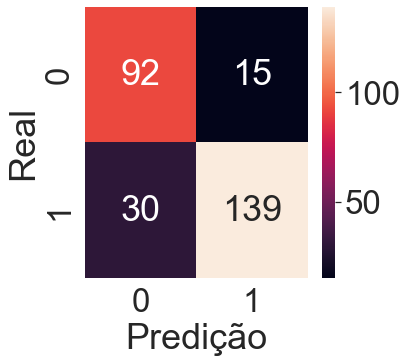


              precision    recall  f1-score   support

           0       0.75      0.86      0.80       107
           1       0.90      0.82      0.86       169

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.85      0.84      0.84       276



In [122]:
# Speração entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_label_encoding_bibilioteca, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()
# Treinamento do Algoritmo
from sklearn.naive_bayes import GaussianNB 

naive = GaussianNB()
naive.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_naive = naive.predict(x_teste)
print('previsões Naive Bayes')
display(previsoes_naive)
print()
print('classificação correta')
display(y_teste) 
print()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Naive Bayes: {accuracy_score(y_teste, previsoes_naive)}')

plt.figure(figsize = (5,5))
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_naive), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_naive))

* Dados com Escalonamento

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

previsões Naive Bayes


array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)


classificação correta


array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)


Acurácia Naive Bayes: 0.8369565217391305


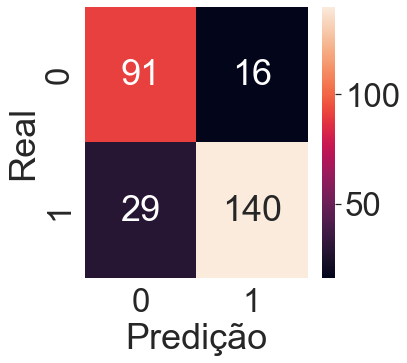


              precision    recall  f1-score   support

           0       0.76      0.85      0.80       107
           1       0.90      0.83      0.86       169

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.84      0.84      0.84       276



In [123]:
# Speração entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_label_encoding_mao_esc, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()
# Treinamento do Algoritmo
from sklearn.naive_bayes import GaussianNB 

naive = GaussianNB()
naive.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_naive = naive.predict(x_teste)
print('previsões Naive Bayes')
display(previsoes_naive)
print()
print('classificação correta')
display(y_teste) 
print()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Naive Bayes: {accuracy_score(y_teste, previsoes_naive)}')

plt.figure(figsize = (5,5))
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_naive), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_naive))

* Dados com One Hot Encoding 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

previsões Naive Bayes


array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)


classificação correta


array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)


Acurácia Naive Bayes: 0.8442028985507246


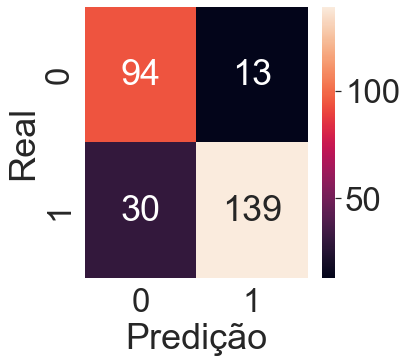


              precision    recall  f1-score   support

           0       0.76      0.88      0.81       107
           1       0.91      0.82      0.87       169

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.84      0.85       276



In [124]:
# Speração entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_one_hot_encoding, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()
# Treinamento do Algoritmo
from sklearn.naive_bayes import GaussianNB 

naive = GaussianNB()
naive.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_naive = naive.predict(x_teste)
print('previsões Naive Bayes')
display(previsoes_naive)
print()
print('classificação correta')
display(y_teste) 
print()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Naive Bayes: {accuracy_score(y_teste, previsoes_naive)}')

plt.figure(figsize = (5,5))
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_naive), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_naive))

* Dados com One Hot Enconding Escalonado 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

previsões Naive Bayes


array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)


classificação correta


array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)


Acurácia Naive Bayes: 0.8442028985507246


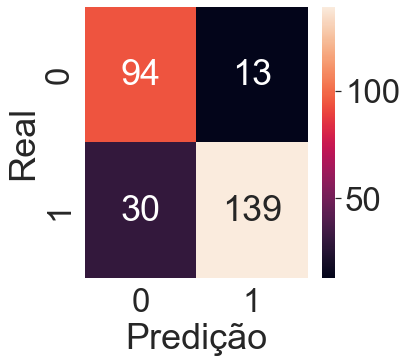


              precision    recall  f1-score   support

           0       0.76      0.88      0.81       107
           1       0.91      0.82      0.87       169

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.84      0.85       276



In [125]:
# Speração entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_one_hot_encoding_esc, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()
# Treinamento do Algoritmo
from sklearn.naive_bayes import GaussianNB 

naive = GaussianNB()
naive.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_naive = naive.predict(x_teste)
print('previsões Naive Bayes')
display(previsoes_naive)
print()
print('classificação correta')
display(y_teste) 
print()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Naive Bayes: {accuracy_score(y_teste, previsoes_naive)}')

plt.figure(figsize = (5,5))
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_naive), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_naive))

* Validação Cruzada

In [126]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

# Separando os Dados em Folds 
kfold = KFold(n_splits = 30, shuffle = True, random_state = 42) # 30 grupos, shuffle embaralhamento e random_state elimina aleatoriedade

# Criando o Modelo 

modelo = GaussianNB()
resultado = cross_val_score(modelo, x_one_hot_encoding_esc, y, cv = kfold)
print('Resultados Cross Validation')
print(resultado)
print()
# Usamos a Média e o Desvio Padrão dos Modelos Calculados 

resultado_naive_bayes = resultado.mean()*100
print(f'Acurácia Média Naive Bayes Cross Validation: {resultado_naive_bayes}')

Resultados Cross Validation
[0.70967742 0.80645161 0.87096774 0.83870968 0.90322581 0.77419355
 0.90322581 0.90322581 0.96774194 0.87096774 0.93548387 0.90322581
 0.93548387 0.87096774 0.80645161 0.83870968 0.83870968 0.8
 0.86666667 0.9        0.8        0.8        0.83333333 0.86666667
 0.9        0.83333333 0.86666667 0.76666667 0.83333333 0.76666667]

Acurácia Média Naive Bayes Cross Validation: 85.0358422939068


> 1. A Validação Cruzada teve um desempenho superior ao Hold Out 

## 3.2) Máquina de Vetor Suporte - SVM

> 1. CONFERIR : 

https://medium.com/turing-talks/turing-talks-12-classifica%C3%A7%C3%A3o-por-svm-f4598094a3f1

http://www2.decom.ufop.br/imobilis/svm-entendendo-sua-matematica-parte-2-o-hiperplano/

https://www.kdnuggets.com/2016/06/select-support-vector-machine-kernels.html

https://vitalflux.com/how-know-data-linear-non-linear/#:~:text=Linear%20data%20is%20data%20that,represented%20on%20a%20line%20graph.

https://www.youtube.com/watch?v=b8nP9g0p8X4&list=PLx0_irNtEGIX73c60NTUarS8Xz9bQjD61&index=7&ab_channel=ManualdoMachineLearning

https://www.youtube.com/watch?v=E96yS86r4SA&list=PLFE-LjWAAP9R4G0WOXWuha4P5cCvw7hGB&index=13&ab_channel=DataICMC

https://www.youtube.com/watch?v=efR1C6CvhmE&list=PLblh5JKOoLUL3IJ4-yor0HzkqDQ3JmJkc&ab_channel=StatQuestwithJoshStarmer



### 1) Conceitos Fundamentais

<img src = './img18.png' width = '70%'>

<img src = './img24.png' width = '70%'>

<img src = './img25.png' width = '70%'>

<img src = './img19.png' width = '70%'>

<img src = './img21.png' width = '70%'>

<img src = './img22.png' width = '70%'>



### 2) Funcionamento

* 1. Hiperplanos

<img src = './img99.png' width = '70%'>

* 2. Fronteiras de Separação Lineares

<img src = './img85.png' width = '70%'>

<img src = './img86.png' width = '70%'>

<img src = './img87.png' width = '70%'>

<img src = './img88.png' width = '70%'>

<img src = './img89.png' width = '70%'>

<img src = './img90.png' width = '70%'>

* 3. Fronteiras de Separação Não-Lineares

<img src = './img91.png' width = '70%'>

<img src = './img92.png' width = '70%'>

<img src = './img93.png' width = '70%'>

* 4. SVM para Múltiplas Classes

<img src = './img94.png' width = '70%'>


### 3) Implementação em Python do Algoritmo SVM 

* Dados sem Escalonamento

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia SVM TREINO: 0.84399375975039


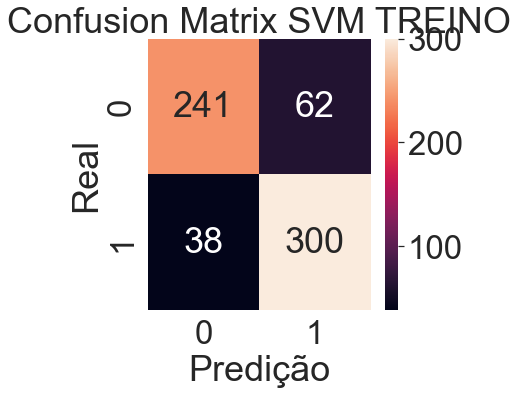


              precision    recall  f1-score   support

           0       0.86      0.80      0.83       303
           1       0.83      0.89      0.86       338

    accuracy                           0.84       641
   macro avg       0.85      0.84      0.84       641
weighted avg       0.85      0.84      0.84       641

Acurácia SVM TESTE: 0.8623188405797102


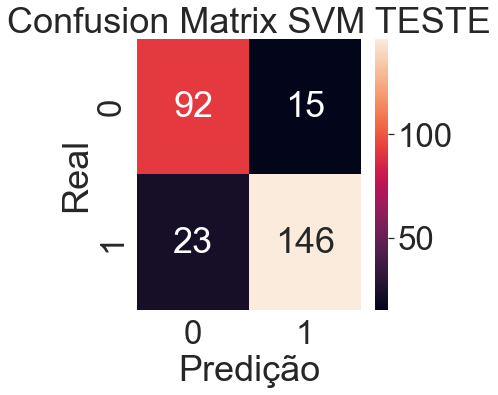


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       107
           1       0.91      0.86      0.88       169

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276



In [127]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_label_encoding_bibilioteca, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.svm import SVC 

svm = SVC(kernel = 'linear', random_state = 42, C = 20)
svm.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_svm_treino = svm.predict(x_treino)
previsoes_svm_teste = svm.predict(x_teste)
# print('previsões SVM')
# display(previsoes_svm_teste)
# print()
# print('classificação correta')
# display(y_teste) 
# print()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia SVM TREINO: {accuracy_score(y_treino, previsoes_svm_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix SVM TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_svm_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_svm_treino))

print(f'Acurácia SVM TESTE: {accuracy_score(y_teste, previsoes_svm_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix SVM TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_svm_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_svm_teste))

* Dados com Escalonamento 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia SVM TREINO: 0.859594383775351


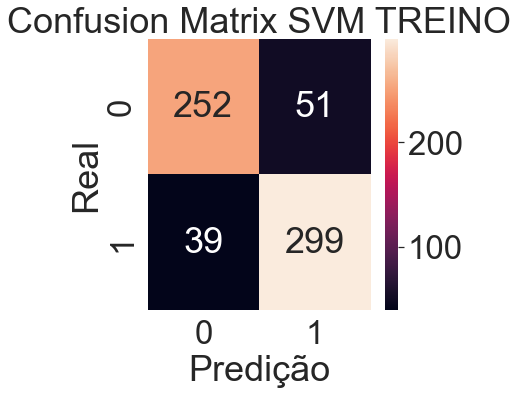


              precision    recall  f1-score   support

           0       0.87      0.83      0.85       303
           1       0.85      0.88      0.87       338

    accuracy                           0.86       641
   macro avg       0.86      0.86      0.86       641
weighted avg       0.86      0.86      0.86       641

Acurácia SVM TESTE: 0.8369565217391305


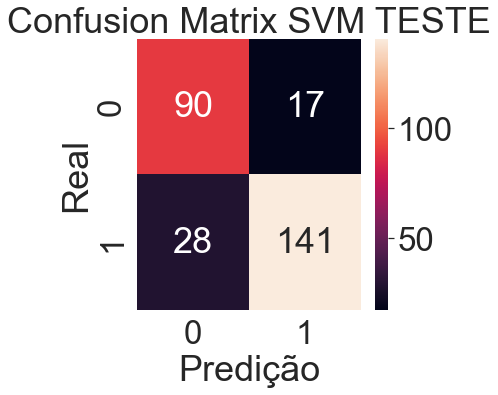


              precision    recall  f1-score   support

           0       0.76      0.84      0.80       107
           1       0.89      0.83      0.86       169

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.84      0.84      0.84       276



In [128]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_label_encoding_mao_esc, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.svm import SVC 

svm = SVC(kernel = 'linear', random_state = 42, C = 20)
svm.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_svm_treino = svm.predict(x_treino)
previsoes_svm_teste = svm.predict(x_teste)
# print('previsões SVM')
# display(previsoes_svm_teste)
# print()
# print('classificação correta')
# display(y_teste) 
# print()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia SVM TREINO: {accuracy_score(y_treino, previsoes_svm_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix SVM TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_svm_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_svm_treino))

print(f'Acurácia SVM TESTE: {accuracy_score(y_teste, previsoes_svm_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix SVM TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_svm_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_svm_teste))

* Dados com One Hot Encoding e Sem Escalonamento 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia SVM TREINO: 0.8564742589703588


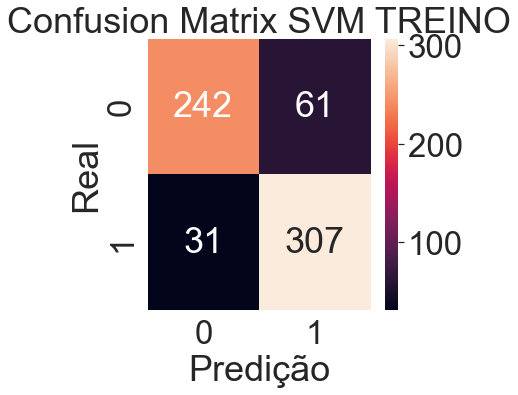


              precision    recall  f1-score   support

           0       0.89      0.80      0.84       303
           1       0.83      0.91      0.87       338

    accuracy                           0.86       641
   macro avg       0.86      0.85      0.85       641
weighted avg       0.86      0.86      0.86       641

Acurácia SVM TESTE: 0.8804347826086957


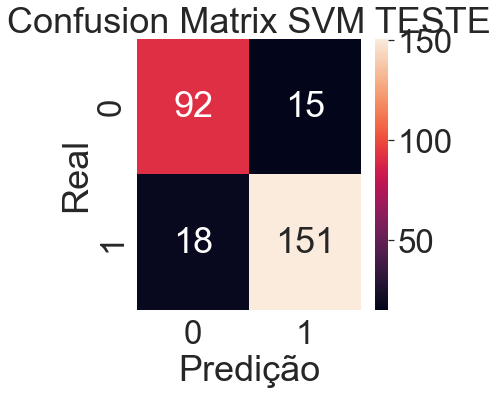


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.91      0.89      0.90       169

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



In [129]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_one_hot_encoding, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.svm import SVC 

svm = SVC(kernel = 'linear', random_state = 42, C = 20)
svm.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_svm_treino = svm.predict(x_treino)
previsoes_svm_teste = svm.predict(x_teste)
# print('previsões SVM')
# display(previsoes_svm_teste)
# print()
# print('classificação correta')
# display(y_teste) 
# print()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia SVM TREINO: {accuracy_score(y_treino, previsoes_svm_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix SVM TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_svm_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_svm_treino))

print(f'Acurácia SVM TESTE: {accuracy_score(y_teste, previsoes_svm_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix SVM TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_svm_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_svm_teste))

* Dados com One Hot Encoding e Escalonamento 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia SVM TREINO: 0.859594383775351


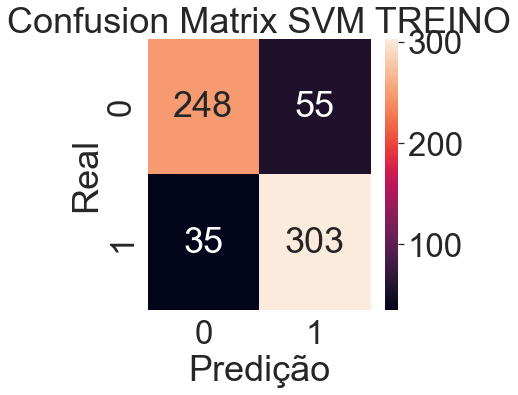


              precision    recall  f1-score   support

           0       0.88      0.82      0.85       303
           1       0.85      0.90      0.87       338

    accuracy                           0.86       641
   macro avg       0.86      0.86      0.86       641
weighted avg       0.86      0.86      0.86       641

Acurácia SVM TESTE: 0.8768115942028986


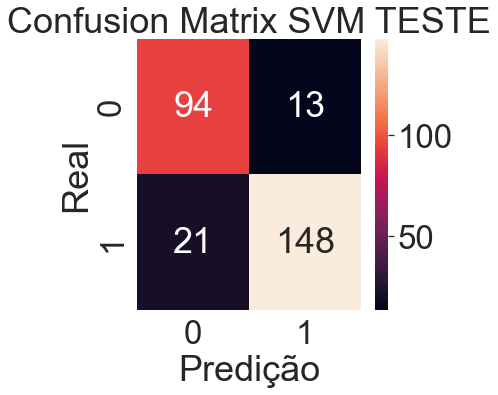


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.92      0.88      0.90       169

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



In [130]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_one_hot_encoding_esc, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.svm import SVC 

svm = SVC(kernel = 'linear', random_state = 42, C = 20)
svm.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_svm_treino = svm.predict(x_treino)
previsoes_svm_teste = svm.predict(x_teste)
# print('previsões SVM')
# display(previsoes_svm_teste)
# print()
# print('classificação correta')
# display(y_teste) 
# print()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia SVM TREINO: {accuracy_score(y_treino, previsoes_svm_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix SVM TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_svm_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_svm_treino))

print(f'Acurácia SVM TESTE: {accuracy_score(y_teste, previsoes_svm_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix SVM TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_svm_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_svm_teste))

* Validação Cruzada 

In [131]:
# from sklearn.model_selection import KFold 
# from sklearn.model_selection import cross_val_score 

# # Separando os Dados em Folds 
# kfold = KFold(n_splits = 30, shuffle = True, random_state = 42) # 30 grupos, shuffle embaralhamento e random_state elimina aleatoriedade

# # Criando o Modelo 

# modelo = SVC(kernel = 'linear', random_state = 42, C = 20)
# resultado = cross_val_score(modelo, x_one_hot_encoding, y, cv = kfold)
# print('Resultados Cross Validation')
# print(resultado)
# print()
# # Usamos a Média e o Desvio Padrão dos Modelos Calculados 

# resultado_svm = resultado.mean()*100
# print(f'Acurácia Média SVM Cross Validation: {resultado_svm}')

## 3.3) Regressão Logística

> 1. CONFERIR : 

https://medium.com/turing-talks/turing-talks-14-modelo-de-predi%C3%A7%C3%A3o-regress%C3%A3o-log%C3%ADstica-7b70a9098e43

http://www.ernestoamaral.com/docs/dcp859b4-102/Aula042.pdf

https://pt.wikipedia.org/wiki/Raz%C3%A3o_de_possibilidades

https://homepages.dcc.ufmg.br/~assuncao/EstatCC/Slides/Logistica.pdf

https://www.youtube.com/watch?v=PDXGgCE8pLQ&list=PLDoqBsM6cBJbHnTpz9T1itfHaxQdhx7b1&index=10&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

https://www.youtube.com/watch?v=4eYwvvPyDeQ&list=PLFE-LjWAAP9R4G0WOXWuha4P5cCvw7hGB&index=11&ab_channel=DataICMC

https://medium.com/@data.science.enthusiast/how-to-improve-logistic-regression-in-imbalanced-data-with-class-weights-1693719136aa

### 1) Conceitos Fundamentais 

<img src = './img100.png' width = '70%'>
<img src = './img101.png' width = '70%'>
<img src = './img102.png' width = '70%'>
<img src = './img103.png' width = '70%'>


### 2) Funcionamento 

<img src = './img104.png' width = '70%'>
<img src = './img105.png' width = '70%'>
<img src = './img106.png' width = '70%'>
<img src = './img107.png' width = '70%'>
<img src = './img108.png' width = '70%'>
<img src = './img109.png' width = '70%'>
<img src = './img110.png' width = '70%'>
<img src = './img111.png' width = '70%'>
<img src = './img112.png' width = '70%'>
<img src = './img113.png' width = '70%'>
<img src = './img114.png' width = '70%'>
<img src = './img115.png' width = '70%'>
<img src = './img116.png' width = '70%'>
<img src = './img117.png' width = '70%'>
<img src = './img118.png' width = '70%'>
<img src = './img119.png' width = '70%'>
<img src = './img120.png' width = '70%'>
<img src = './img121.png' width = '70%'>

* Neste caso, significa que a chance de morrer de quem fuma (numerador) é 5x maior de quem não fuma (denominador).

<img src = './img122.png' width = '70%'>
<img src = './img123.png' width = '70%'>




### 3) Implementação em Python do Algoritmo Regressão Logística 

* Dados sem Escalonamento 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Intercepto: [1.67258374]
Coeficientes: [[ 1.04728992e-02  1.27754036e+00 -6.55780325e-01  2.42843591e-03
  -5.12338800e-04  1.00102058e+00 -1.17760199e-01 -8.61986770e-03
   9.66742763e-01  4.20294077e-01 -1.73117596e+00]]

Acurácia Regressão Logística TREINO: 0.8486739469578783


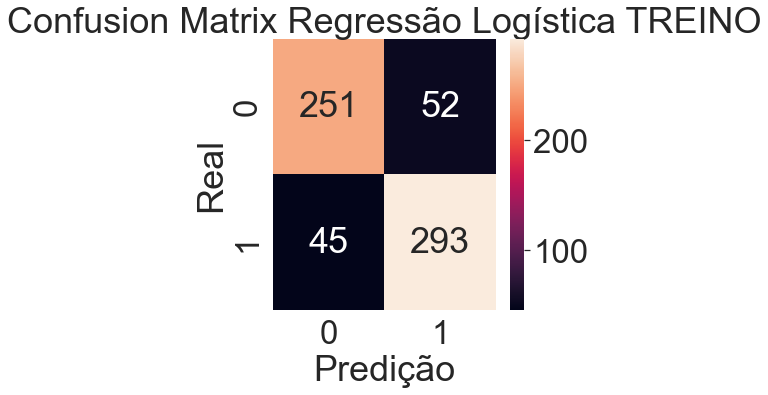


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       303
           1       0.85      0.87      0.86       338

    accuracy                           0.85       641
   macro avg       0.85      0.85      0.85       641
weighted avg       0.85      0.85      0.85       641

Acurácia Regressão Logística TESTE: 0.855072463768116


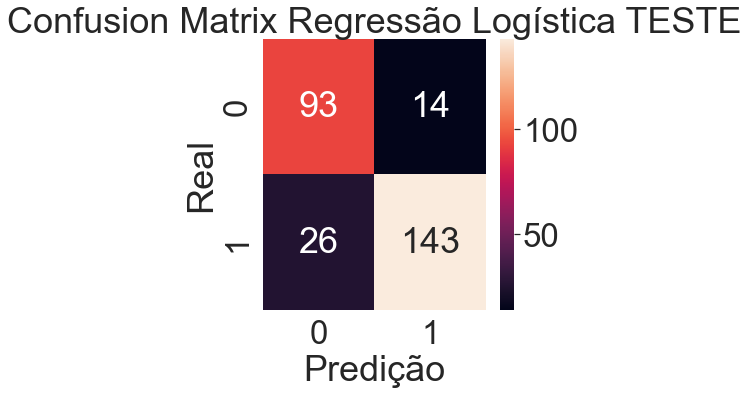


              precision    recall  f1-score   support

           0       0.78      0.87      0.82       107
           1       0.91      0.85      0.88       169

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



In [132]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_label_encoding_bibilioteca, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.linear_model import LogisticRegression

logistica = LogisticRegression(random_state = 42, max_iter = 1000, penalty = 'l2', C = 1, solver = 'lbfgs')
logistica.fit(x_treino, y_treino)
print(f'Intercepto: {logistica.intercept_}')
print(f'Coeficientes: {logistica.coef_}')
print()

# Avaliação do Algoritmo

previsoes_logistica_treino = logistica.predict(x_treino)
previsoes_logistica_teste = logistica.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Regressão Logística TREINO: {accuracy_score(y_treino, previsoes_logistica_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Regressão Logística TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_logistica_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_logistica_treino))

print(f'Acurácia Regressão Logística TESTE: {accuracy_score(y_teste, previsoes_logistica_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Regressão Logística TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_logistica_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_logistica_teste))

* Dados com Escalonamento 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Intercepto: [0.22911659]
Coeficientes: [[ 0.06678828 -0.54962973  0.68706496  0.03773805  0.02890838  0.44591399
   0.03947123 -0.19618799  0.46566783  0.40984598  1.04211637]]

Acurácia Regressão Logística TREINO: 0.8486739469578783


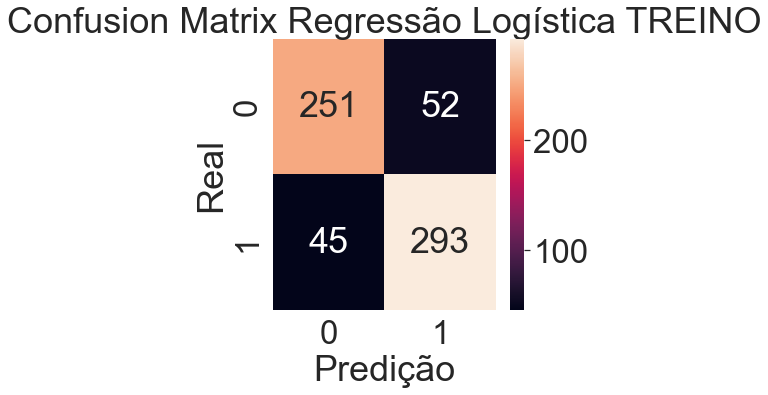


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       303
           1       0.85      0.87      0.86       338

    accuracy                           0.85       641
   macro avg       0.85      0.85      0.85       641
weighted avg       0.85      0.85      0.85       641

Acurácia Regressão Logística TESTE: 0.8623188405797102


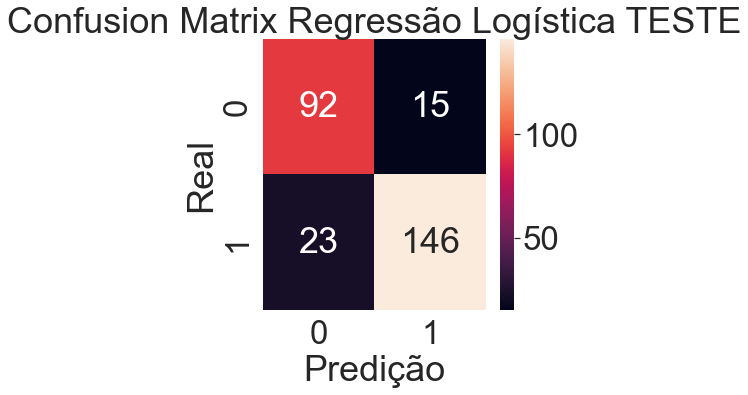


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       107
           1       0.91      0.86      0.88       169

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276



In [133]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_label_encoding_mao_esc, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.linear_model import LogisticRegression

logistica = LogisticRegression(random_state = 42, max_iter = 1000, penalty = 'l2', C = 1, solver = 'lbfgs')
logistica.fit(x_treino, y_treino)
print(f'Intercepto: {logistica.intercept_}')
print(f'Coeficientes: {logistica.coef_}')
print()

# Avaliação do Algoritmo

previsoes_logistica_treino = logistica.predict(x_treino)
previsoes_logistica_teste = logistica.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Regressão Logística TREINO: {accuracy_score(y_treino, previsoes_logistica_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Regressão Logística TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_logistica_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_logistica_treino))

print(f'Acurácia Regressão Logística TESTE: {accuracy_score(y_teste, previsoes_logistica_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Regressão Logística TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_logistica_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_logistica_teste))

* Dados com One Hot Encoding e sem Escalonamento 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Intercepto: [-0.12304858]
Coeficientes: [[-7.73656674e-01  6.60474613e-01  1.12339075e+00 -5.66648967e-01
  -4.19579886e-01 -2.50343958e-01  1.47846397e-02 -8.13266886e-02
  -4.66400126e-02 -4.56093750e-01  3.42911689e-01  8.49358297e-02
   1.06567249e+00 -1.26379039e+00  9.59433731e-03 -1.66467914e-03
  -7.95801513e-04  1.06533064e+00 -7.23448240e-03  4.04692091e-01]]

Acurácia Regressão Logística TREINO: 0.8471138845553822


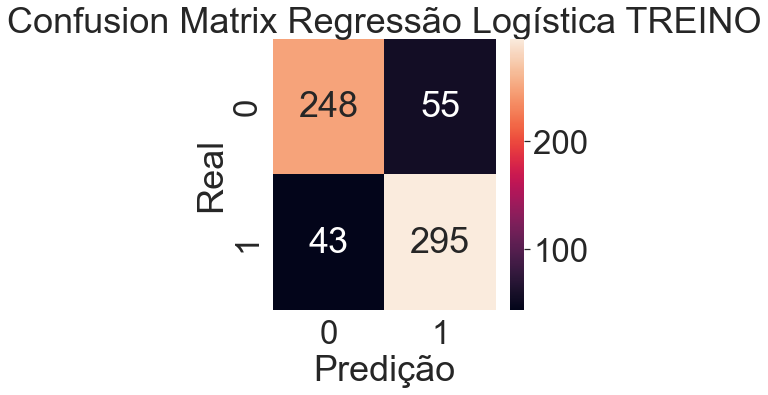


              precision    recall  f1-score   support

           0       0.85      0.82      0.84       303
           1       0.84      0.87      0.86       338

    accuracy                           0.85       641
   macro avg       0.85      0.85      0.85       641
weighted avg       0.85      0.85      0.85       641

Acurácia Regressão Logística TESTE: 0.8768115942028986


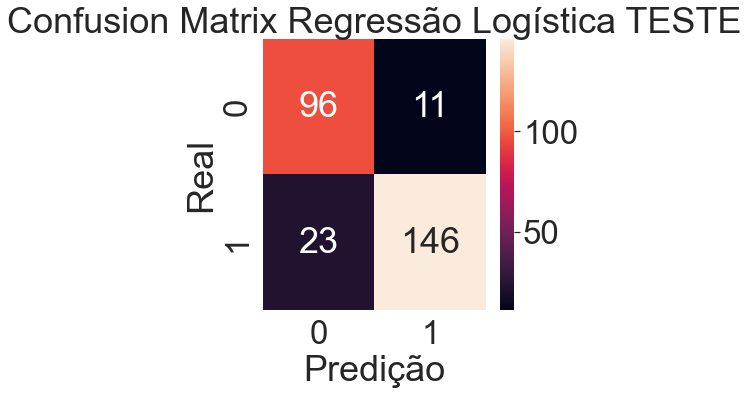


              precision    recall  f1-score   support

           0       0.81      0.90      0.85       107
           1       0.93      0.86      0.90       169

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



In [134]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_one_hot_encoding, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.linear_model import LogisticRegression

logistica = LogisticRegression(random_state = 42, max_iter = 1000, penalty = 'l2', C = 1, solver = 'lbfgs')
logistica.fit(x_treino, y_treino)
print(f'Intercepto: {logistica.intercept_}')
print(f'Coeficientes: {logistica.coef_}')
print()

# Avaliação do Algoritmo

previsoes_logistica_treino = logistica.predict(x_treino)
previsoes_logistica_teste = logistica.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Regressão Logística TREINO: {accuracy_score(y_treino, previsoes_logistica_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Regressão Logística TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_logistica_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_logistica_treino))

print(f'Acurácia Regressão Logística TESTE: {accuracy_score(y_teste, previsoes_logistica_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Regressão Logística TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_logistica_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_logistica_teste))

* Dados com One Hot Encoding e com Escalonamento 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Intercepto: [0.1528519]
Coeficientes: [[-0.31098144  0.31098144  0.49800602 -0.30289546 -0.25616505 -0.10766016
   0.019593   -0.01265017 -0.00433594 -0.19534082  0.19534082  0.04461519
   0.59004431 -0.61857567  0.10678251 -0.01649752 -0.03584451  0.48684545
  -0.14452282  0.41883697]]

Acurácia Regressão Logística TREINO: 0.8502340093603744


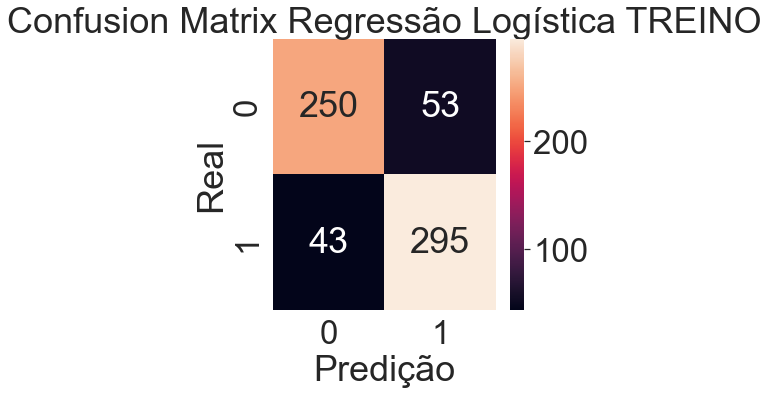


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       303
           1       0.85      0.87      0.86       338

    accuracy                           0.85       641
   macro avg       0.85      0.85      0.85       641
weighted avg       0.85      0.85      0.85       641

Acurácia Regressão Logística TESTE: 0.8768115942028986


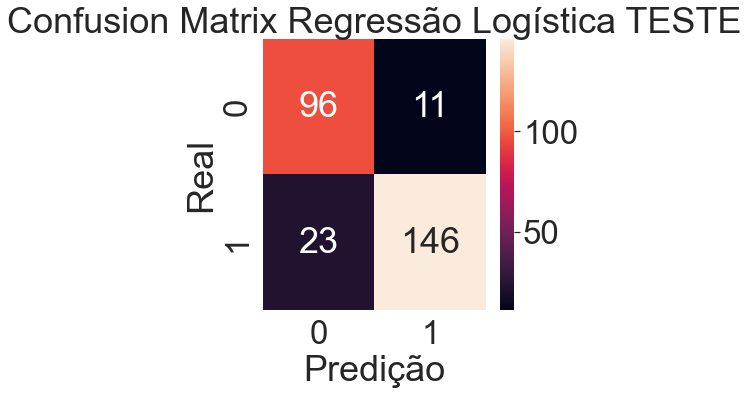


              precision    recall  f1-score   support

           0       0.81      0.90      0.85       107
           1       0.93      0.86      0.90       169

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



In [135]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_one_hot_encoding_esc, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.linear_model import LogisticRegression

logistica = LogisticRegression(random_state = 42, max_iter = 1000, penalty = 'l2', C = 1, solver = 'lbfgs')
logistica.fit(x_treino, y_treino)
print(f'Intercepto: {logistica.intercept_}')
print(f'Coeficientes: {logistica.coef_}')
print()

# Avaliação do Algoritmo

previsoes_logistica_treino = logistica.predict(x_treino)
previsoes_logistica_teste = logistica.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Regressão Logística TREINO: {accuracy_score(y_treino, previsoes_logistica_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Regressão Logística TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_logistica_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_logistica_treino))

print(f'Acurácia Regressão Logística TESTE: {accuracy_score(y_teste, previsoes_logistica_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Regressão Logística TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_logistica_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_logistica_teste))

* Validação Cruzada 

In [136]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

# Separando os Dados em Folds 
kfold = KFold(n_splits = 30, shuffle = True, random_state = 42) # 30 grupos, shuffle embaralhamento e random_state elimina aleatoriedade

# Criando o Modelo 

modelo = LogisticRegression(random_state = 42, max_iter = 1000, penalty = 'l2', C = 1, solver = 'lbfgs')
resultado = cross_val_score(modelo, x_one_hot_encoding_esc, y, cv = kfold)
print('Resultados Cross Validation')
print(resultado)
print()
# Usamos a Média e o Desvio Padrão dos Modelos Calculados 

resultado_logistica = resultado.mean()*100
print(f'Acurácia Média Regressão Logística Cross Validation: {resultado_logistica}')

Resultados Cross Validation
[0.87096774 0.90322581 0.87096774 0.83870968 0.90322581 0.87096774
 0.87096774 0.87096774 0.96774194 0.90322581 0.90322581 0.90322581
 0.93548387 0.87096774 0.87096774 0.77419355 0.87096774 0.83333333
 0.86666667 0.9        0.8        0.86666667 0.76666667 0.86666667
 0.83333333 0.83333333 0.8        0.76666667 0.8        0.86666667]

Acurácia Média Regressão Logística Cross Validation: 85.99999999999999


## 3.4) Aprendizagem Baseada em Instâncias - KNN

> 1. CONFERIR : 

https://medium.com/turing-talks/turing-talks-13-modelo-de-predi%C3%A7%C3%A3o-knn-3be880c9b9d1

https://www.youtube.com/watch?v=R0Ie0eaoBeE&list=PLDoqBsM6cBJbHnTpz9T1itfHaxQdhx7b1&index=12&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

https://www.youtube.com/watch?v=dd3RmNfThF8&list=PLFE-LjWAAP9R4G0WOXWuha4P5cCvw7hGB&index=1&ab_channel=DataICMC

### 1) Conceitos Fundamentais 

<img src = './img125.png' width = '70%'>
<img src = './img126.png' width = '70%'>
<img src = './img127.png' width = '70%'>
<img src = './img128.png' width = '70%'>
<img src = './img144.png' width = '70%'>
<img src = './img145.png' width = '70%'>

### 2) Funcionamento 

<img src = './img129.png' width = '70%'>
<img src = './img130.png' width = '70%'>
<img src = './img131.png' width = '70%'>
<img src = './img132.png' width = '70%'>
<img src = './img133.png' width = '70%'>
<img src = './img134.png' width = '70%'>
<img src = './img135.png' width = '70%'>
<img src = './img136.png' width = '70%'>
<img src = './img137.png' width = '70%'>
<img src = './img138.png' width = '70%'>
<img src = './img139.png' width = '70%'>
<img src = './img140.png' width = '70%'>
<img src = './img141.png' width = '70%'>
<img src = './img142.png' width = '70%'>
<img src = './img143.png' width = '70%'>


### 3) Implementação em Python do Algoritmo KNN 

* Dados sem Escalonamento

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia KNN TESTE: 0.7028985507246377


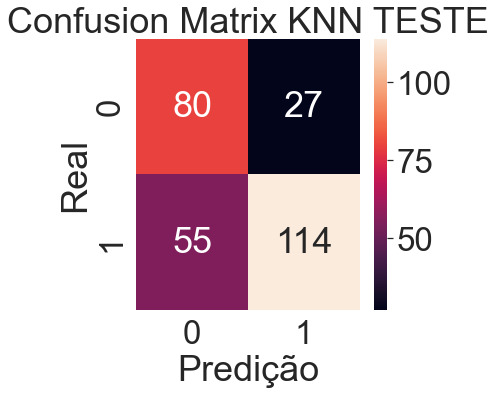


              precision    recall  f1-score   support

           0       0.59      0.75      0.66       107
           1       0.81      0.67      0.74       169

    accuracy                           0.70       276
   macro avg       0.70      0.71      0.70       276
weighted avg       0.72      0.70      0.71       276



In [137]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_label_encoding_bibilioteca, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')
knn.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_knn_teste = knn.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia KNN TESTE: {accuracy_score(y_teste, previsoes_knn_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix KNN TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_knn_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_knn_teste))

* Dados com Escalonamento

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia KNN TESTE: 0.8659420289855072


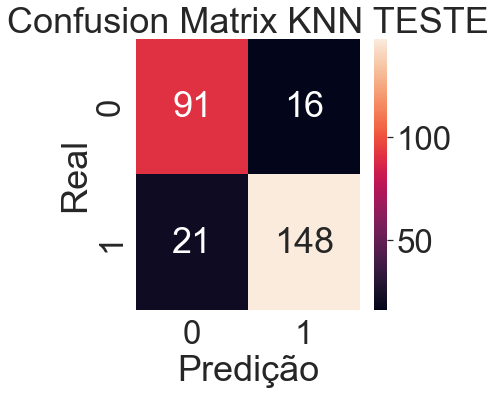


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       107
           1       0.90      0.88      0.89       169

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



In [138]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_label_encoding_mao_esc, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')
knn.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_knn_teste = knn.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia KNN TESTE: {accuracy_score(y_teste, previsoes_knn_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix KNN TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_knn_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_knn_teste))

* Dados com One Hot Encoder sem Escalonamento

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia KNN TESTE: 0.7427536231884058


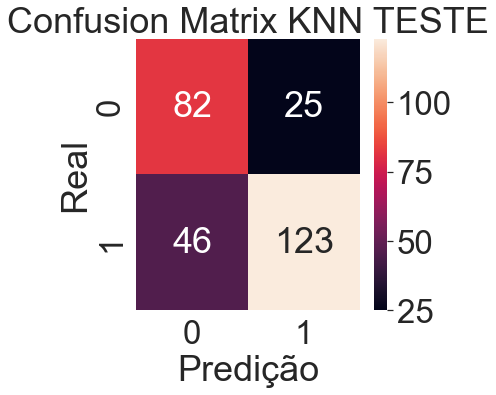


              precision    recall  f1-score   support

           0       0.64      0.77      0.70       107
           1       0.83      0.73      0.78       169

    accuracy                           0.74       276
   macro avg       0.74      0.75      0.74       276
weighted avg       0.76      0.74      0.75       276



In [139]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_one_hot_encoding, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')
knn.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_knn_teste = knn.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia KNN TESTE: {accuracy_score(y_teste, previsoes_knn_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix KNN TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_knn_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_knn_teste))

* Dados com One Hot Encoder com Escalonamento

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia KNN TESTE: 0.8442028985507246


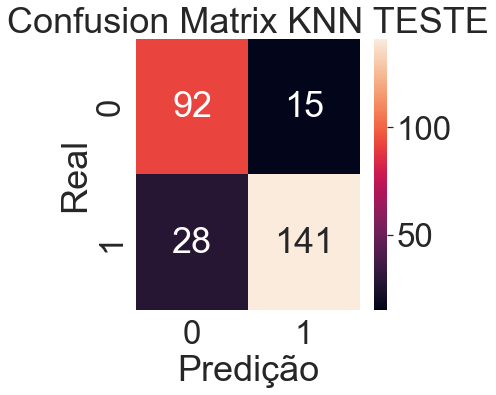


              precision    recall  f1-score   support

           0       0.77      0.86      0.81       107
           1       0.90      0.83      0.87       169

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.84      0.85       276



In [140]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_one_hot_encoding_esc, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')
knn.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_knn_teste = knn.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia KNN TESTE: {accuracy_score(y_teste, previsoes_knn_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix KNN TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_knn_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_knn_teste))

* Validação Cruzada 

In [141]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

# Separando os Dados em Folds 
kfold = KFold(n_splits = 30, shuffle = True, random_state = 42) # 30 grupos, shuffle embaralhamento e random_state elimina aleatoriedade

# Criando o Modelo 

modelo = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')
resultado = cross_val_score(modelo, x_one_hot_encoding_esc, y, cv = kfold)
print('Resultados Cross Validation')
print(resultado)
print()
# Usamos a Média e o Desvio Padrão dos Modelos Calculados 

resultado_knn= resultado.mean()*100
print(f'Acurácia Média KNN Cross Validation: {resultado_knn}')

Resultados Cross Validation
[0.90322581 0.90322581 0.87096774 0.87096774 0.90322581 0.83870968
 0.87096774 0.83870968 0.90322581 0.87096774 0.93548387 0.83870968
 0.93548387 0.83870968 0.90322581 0.90322581 0.87096774 0.73333333
 0.73333333 0.93333333 0.83333333 0.9        0.73333333 0.9
 0.76666667 0.86666667 0.86666667 0.76666667 0.83333333 0.86666667]

Acurácia Média KNN Cross Validation: 85.77777777777776


## 3.5) Árvores de Decisão 


> 1. CONFERIR : 

https://medium.com/turing-talks/turing-talks-17-modelos-de-predi%C3%A7%C3%A3o-decision-tree-610aa484cb05

https://k3ybladewielder.medium.com/m%C3%A9todos-de-aprendizagem-supervisionada-baseados-em-%C3%A1rvore-2c0580fe8f10

https://www.youtube.com/watch?v=dd3RmNfThF8&list=PLFE-LjWAAP9R4G0WOXWuha4P5cCvw7hGB&index=1&ab_channel=DataICMC

https://www.youtube.com/watch?v=BDqejVlCfvc&list=PLwnip85KhroUBuVfAEUz4jE5ejQ5vXf6N&ab_channel=MarioFilho

https://www.youtube.com/watch?v=ecYpXd4WREk&list=PLtQM10PgmGogjn0cikgWi8wpQUnV6ERkY&index=3&ab_channel=DiogoCortiz

https://www.youtube.com/watch?v=ciWT5r-ckpw&list=PLtQM10PgmGogjn0cikgWi8wpQUnV6ERkY&index=6&ab_channel=DiogoCortiz

https://www.youtube.com/watch?v=e1wpnYPGZwQ&list=PLDoqBsM6cBJbHnTpz9T1itfHaxQdhx7b1&index=16&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

https://www.youtube.com/watch?v=_L39rN6gz7Y&list=PLblh5JKOoLUKAtDViTvRGFpphEc24M-QH&ab_channel=StatQuestwithJoshStarmer

### 1) Conceitos Fundamentais

<img src = './img146.png' width = '70%'>
<img src = './img147.png' width = '70%'>
<img src = './img148.png' width = '70%'>
<img src = './img149.png' width = '70%'>
<img src = './img150.png' width = '70%'>
<img src = './img151.png' width = '70%'>
<img src = './img152.png' width = '70%'>
<img src = './img153.png' width = '70%'>
<img src = './img154.png' width = '70%'>
<img src = './img186.png' width = '70%'>
<img src = './img187.png' width = '70%'>


### 2) Funcionamento

<img src = './img155.png' width = '70%'>
<img src = './img156.png' width = '70%'>
<img src = './img157.png' width = '70%'>
<img src = './img158.png' width = '70%'>
<img src = './img159.png' width = '70%'>
<img src = './img160.png' width = '70%'>
<img src = './img161.png' width = '70%'>
<img src = './img162.png' width = '70%'>
<img src = './img163.png' width = '70%'>
<img src = './img589.png' width = '70%'>
<img src = './img164.png' width = '70%'>
<img src = './img165.png' width = '70%'>
<img src = './img166.png' width = '70%'>
<img src = './img167.png' width = '70%'>
<img src = './img168.png' width = '70%'>
<img src = './img169.png' width = '70%'>
<img src = './img171.png' width = '70%'>
<img src = './img172.png' width = '70%'>
<img src = './img173.png' width = '70%'>
<img src = './img174.png' width = '70%'>
<img src = './img175.png' width = '70%'>
<img src = './img176.png' width = '70%'>
<img src = './img177.png' width = '70%'>
<img src = './img178.png' width = '70%'>
<img src = './img179.png' width = '70%'>
<img src = './img180.png' width = '70%'>
<img src = './img181.png' width = '70%'>
<img src = './img182.png' width = '70%'>
<img src = './img183.png' width = '70%'>
<img src = './img184.png' width = '70%'>
<img src = './img185.png' width = '70%'>


### 3) Implementação em Python do Algoritmo de Árvores de Decisão 

* Dados Sem Escalonamento 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia Árvore de Decisão TREINO: 0.8627145085803433


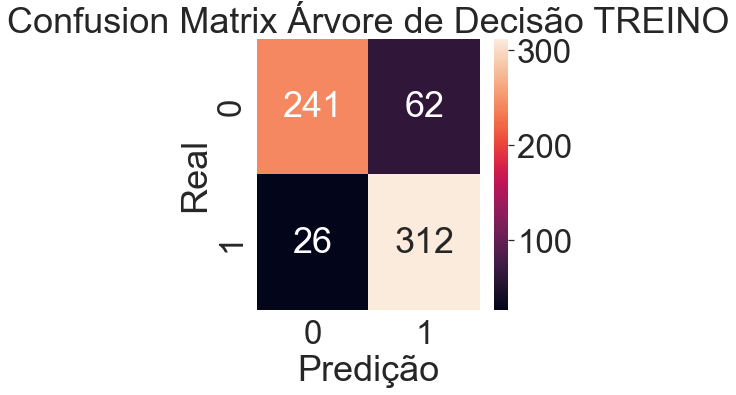


              precision    recall  f1-score   support

           0       0.90      0.80      0.85       303
           1       0.83      0.92      0.88       338

    accuracy                           0.86       641
   macro avg       0.87      0.86      0.86       641
weighted avg       0.87      0.86      0.86       641

Acurácia Árvore de Decisão TESTE: 0.855072463768116


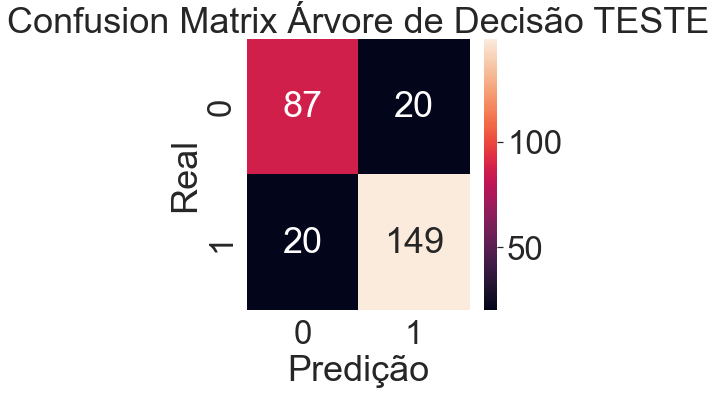


              precision    recall  f1-score   support

           0       0.81      0.81      0.81       107
           1       0.88      0.88      0.88       169

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



In [142]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_label_encoding_bibilioteca, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(random_state = 42, criterion='entropy', max_depth = 4)
arvore.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_arvore_treino = arvore.predict(x_treino)
previsoes_arvore_teste = arvore.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Árvore de Decisão TREINO: {accuracy_score(y_treino, previsoes_arvore_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Árvore de Decisão TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_arvore_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_arvore_treino))

print(f'Acurácia Árvore de Decisão TESTE: {accuracy_score(y_teste, previsoes_arvore_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Árvore de Decisão TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_arvore_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_arvore_teste))

* Dados Com Escalonamento 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia Árvore de Decisão TREINO: 0.8627145085803433


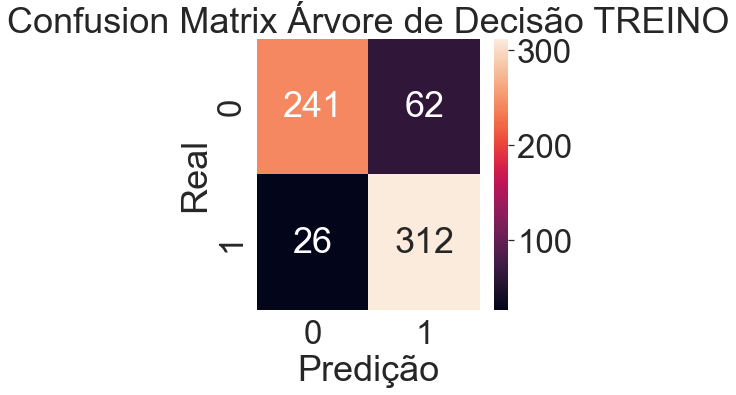


              precision    recall  f1-score   support

           0       0.90      0.80      0.85       303
           1       0.83      0.92      0.88       338

    accuracy                           0.86       641
   macro avg       0.87      0.86      0.86       641
weighted avg       0.87      0.86      0.86       641

Acurácia Árvore de Decisão TESTE: 0.855072463768116


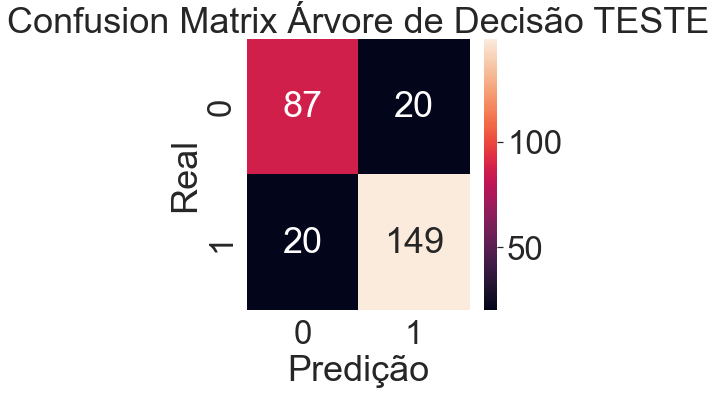


              precision    recall  f1-score   support

           0       0.81      0.81      0.81       107
           1       0.88      0.88      0.88       169

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



In [143]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_label_encoding_mao_esc, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(random_state = 42, criterion='entropy', max_depth = 4)
arvore.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_arvore_treino = arvore.predict(x_treino)
previsoes_arvore_teste = arvore.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Árvore de Decisão TREINO: {accuracy_score(y_treino, previsoes_arvore_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Árvore de Decisão TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_arvore_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_arvore_treino))

print(f'Acurácia Árvore de Decisão TESTE: {accuracy_score(y_teste, previsoes_arvore_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Árvore de Decisão TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_arvore_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_arvore_teste))

* Dados com One Hot Encoder e Sem Escalonamento 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia Árvore de Decisão TREINO: 0.8627145085803433


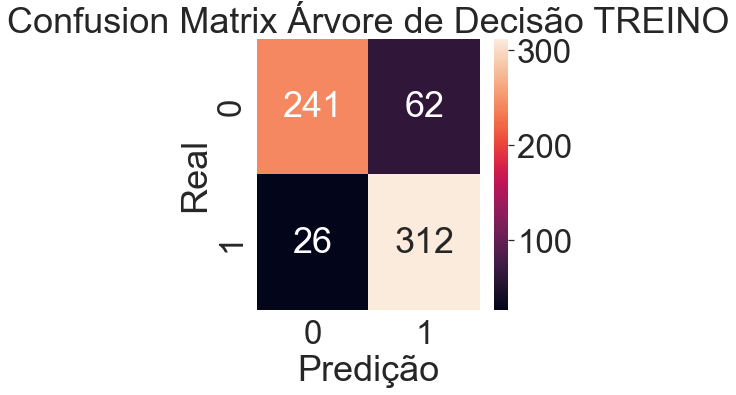


              precision    recall  f1-score   support

           0       0.90      0.80      0.85       303
           1       0.83      0.92      0.88       338

    accuracy                           0.86       641
   macro avg       0.87      0.86      0.86       641
weighted avg       0.87      0.86      0.86       641

Acurácia Árvore de Decisão TESTE: 0.855072463768116


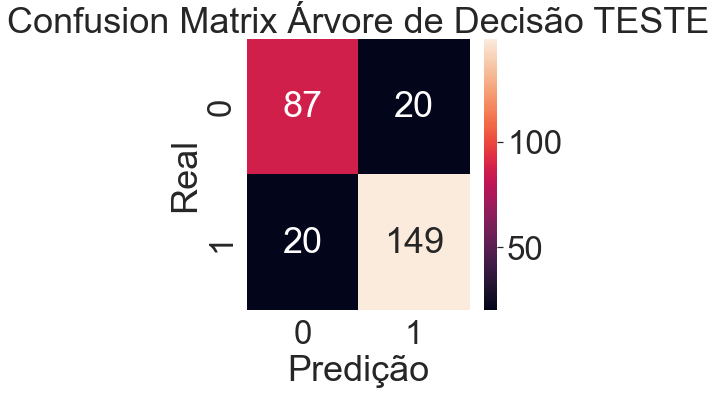


              precision    recall  f1-score   support

           0       0.81      0.81      0.81       107
           1       0.88      0.88      0.88       169

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



In [144]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_one_hot_encoding, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(random_state = 42, criterion='entropy', max_depth = 4)
arvore.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_arvore_treino = arvore.predict(x_treino)
previsoes_arvore_teste = arvore.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Árvore de Decisão TREINO: {accuracy_score(y_treino, previsoes_arvore_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Árvore de Decisão TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_arvore_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_arvore_treino))

print(f'Acurácia Árvore de Decisão TESTE: {accuracy_score(y_teste, previsoes_arvore_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Árvore de Decisão TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_arvore_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_arvore_teste))

* Dados com One Hot Encoder e Com Escalonamento 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia Árvore de Decisão TREINO: 0.8627145085803433


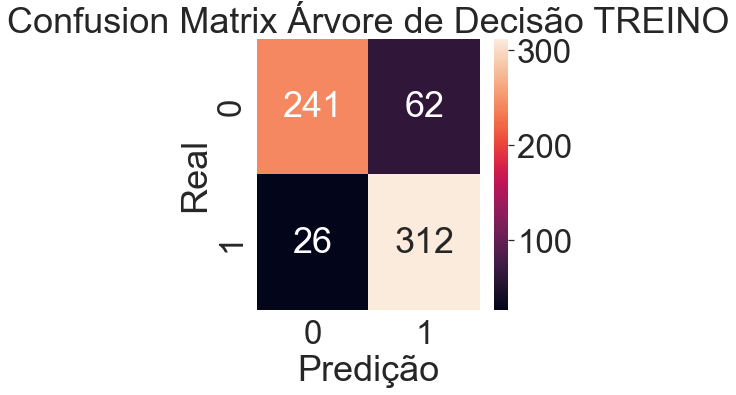


              precision    recall  f1-score   support

           0       0.90      0.80      0.85       303
           1       0.83      0.92      0.88       338

    accuracy                           0.86       641
   macro avg       0.87      0.86      0.86       641
weighted avg       0.87      0.86      0.86       641

Acurácia Árvore de Decisão TESTE: 0.855072463768116


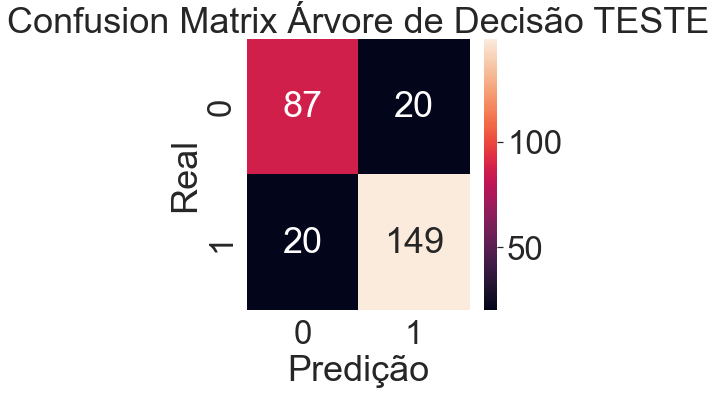


              precision    recall  f1-score   support

           0       0.81      0.81      0.81       107
           1       0.88      0.88      0.88       169

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



In [145]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_one_hot_encoding_esc, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(random_state = 42, criterion='entropy', max_depth = 4)
arvore.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_arvore_treino = arvore.predict(x_treino)
previsoes_arvore_teste = arvore.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Árvore de Decisão TREINO: {accuracy_score(y_treino, previsoes_arvore_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Árvore de Decisão TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_arvore_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_arvore_treino))

print(f'Acurácia Árvore de Decisão TESTE: {accuracy_score(y_teste, previsoes_arvore_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Árvore de Decisão TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_arvore_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_arvore_teste))

* Validação Cruzada

In [146]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

# Separando os Dados em Folds 
kfold = KFold(n_splits = 30, shuffle = True, random_state = 42) # 30 grupos, shuffle embaralhamento e random_state elimina aleatoriedade

# Criando o Modelo 

modelo = DecisionTreeClassifier(random_state = 42, criterion='entropy', max_depth = 4)
resultado = cross_val_score(modelo, x_one_hot_encoding_esc, y, cv = kfold)
print('Resultados Cross Validation')
print(resultado)
print()
# Usamos a Média e o Desvio Padrão dos Modelos Calculados 

resultado_arvore= resultado.mean()*100
print(f'Acurácia Média Árvore de Decisão Cross Validation: {resultado_arvore}')

Resultados Cross Validation
[0.90322581 0.80645161 0.90322581 0.80645161 0.93548387 0.74193548
 0.90322581 0.83870968 0.87096774 0.87096774 0.83870968 0.90322581
 0.93548387 0.83870968 0.87096774 0.80645161 0.83870968 0.7
 0.8        0.9        0.73333333 0.86666667 0.73333333 0.83333333
 0.86666667 0.86666667 0.8        0.8        0.76666667 0.86666667]

Acurácia Média Árvore de Decisão Cross Validation: 83.82078853046596


# <font color='red' style='font-size: 40px;'>4.0 Etapas de Modelagem de Machine Learning para Classificação II - Modelos Ensemble Learning  </font>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    

## 4.1) Modelos Ensemble - Bagging x Boosting 

> 1. CONFERIR : 

https://didatica.tech/metodos-ensemble/

https://medium.com/turing-talks/turing-talks-24-modelos-de-predi%C3%A7%C3%A3o-ensemble-learning-aa02ce01afda

https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205?_branch_match_id=1011986317920432056&_branch_referrer=H4sIAAAAAAAAA8soKSkottLXz8nMy9bLTU3JLM3VS87P1TcujIjIdXb2CS1JAgBqKU2MIwAAAA%3D%3D

https://www.youtube.com/watch?v=qIlFQ5oo_xw&list=PLDoqBsM6cBJbHnTpz9T1itfHaxQdhx7b1&index=18&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

### 1) Conceitos Fundamentais

<img src = './img188.png' width = '70%'>
<img src = './img189.png' width = '70%'>
<img src = './img190.png' width = '70%'>
<img src = './img191.png' width = '70%'>
<img src = './img192.png' width = '70%'>
<img src = './img193.png' width = '70%'>
<img src = './img194.png' width = '70%'>

### 2) Bagging (Reduz a Variância e, consequentemente, o Overfitting)

<img src = './img195.png' width = '70%'>
<img src = './img196.png' width = '70%'>
<img src = './img197.png' width = '70%'>
<img src = './img198.png' width = '70%'>
<img src = './img199.png' width = '70%'>

### 3) Boosting (Reduz o Viés e, consequentemente, o Underfitting)

<img src = './img200.png' width = '70%'>
<img src = './img201.png' width = '70%'>
<img src = './img202.png' width = '70%'>
<img src = './img203.png' width = '70%'>
<img src = './img204.png' width = '70%'>
<img src = './img205.png' width = '70%'>
<img src = './img206.png' width = '70%'>
<img src = './img207.png' width = '70%'>
<img src = './img208.png' width = '70%'>

### 4) Resumo Bagging x Boosting

<img src = './img209.png' width = '70%'>

### 5) Stacking 

<img src = './img225.png' width = '70%'>
<img src = './img226.png' width = '70%'>
<img src = './img227.png' width = '70%'>



## 4.2) Random Forest

> 1. CONFERIR : 

https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/

https://medium.com/turing-talks/turing-talks-18-modelos-de-predi%C3%A7%C3%A3o-random-forest-cfc91cd8e524

https://towardsdatascience.com/understanding-random-forest-58381e0602d2

https://www.youtube.com/watch?v=UrcpXkoeQOo&list=PLFE-LjWAAP9R4G0WOXWuha4P5cCvw7hGB&index=8&ab_channel=DataICMC

https://www.youtube.com/watch?v=RtA1rjhuavs&list=PLwnip85KhroUBuVfAEUz4jE5ejQ5vXf6N&index=2&ab_channel=MarioFilho

https://www.youtube.com/watch?v=qIlFQ5oo_xw&list=PLDoqBsM6cBJbHnTpz9T1itfHaxQdhx7b1&index=18&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&list=PLblh5JKOoLUIE96dI3U7oxHaCAbZgfhHk&ab_channel=StatQuestwithJoshStarmer

### 1) Conceitos Fundamentais

<img src = './img210.png' width = '70%'>
<img src = './img211.png' width = '70%'>
<img src = './img212.png' width = '70%'>
<img src = './img213.png' width = '70%'>
<img src = './img214.png' width = '70%'>
<img src = './img223.png' width = '70%'>
<img src = './img224.png' width = '70%'>

### 2) Funcionamento

<img src = './img215.png' width = '70%'>
<img src = './img216.png' width = '70%'>
<img src = './img217.png' width = '70%'>
<img src = './img218.png' width = '70%'>
<img src = './img219.png' width = '70%'>
<img src = './img220.png' width = '70%'>
<img src = './img221.png' width = '70%'>
<img src = './img222.png' width = '70%'>

### 3) Implementação do Algoritmo Random Forest em Python 

* Dados sem Escalonamento

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia Random Forest TREINO: 0.8736349453978159


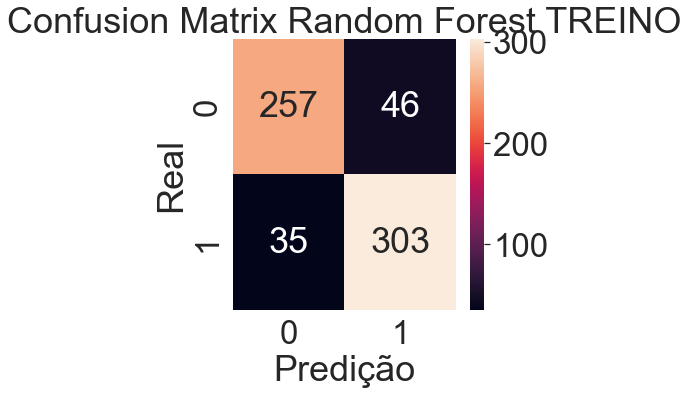


              precision    recall  f1-score   support

           0       0.88      0.85      0.86       303
           1       0.87      0.90      0.88       338

    accuracy                           0.87       641
   macro avg       0.87      0.87      0.87       641
weighted avg       0.87      0.87      0.87       641

Acurácia Random Forest TESTE: 0.8623188405797102


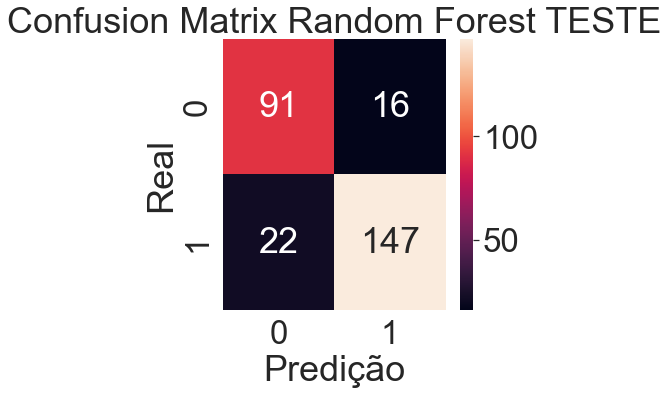


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       107
           1       0.90      0.87      0.89       169

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



In [147]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_label_encoding_bibilioteca, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 42, criterion='entropy', n_estimators=100, max_depth= 4)
random_forest.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_random_forest_treino = random_forest.predict(x_treino)
previsoes_random_forest_teste = random_forest.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Random Forest TREINO: {accuracy_score(y_treino, previsoes_random_forest_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Random Forest TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_random_forest_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_random_forest_treino))

print(f'Acurácia Random Forest TESTE: {accuracy_score(y_teste, previsoes_random_forest_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Random Forest TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_random_forest_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_random_forest_teste))

* Dados com Escalonamento

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia Random Forest TREINO: 0.875195007800312


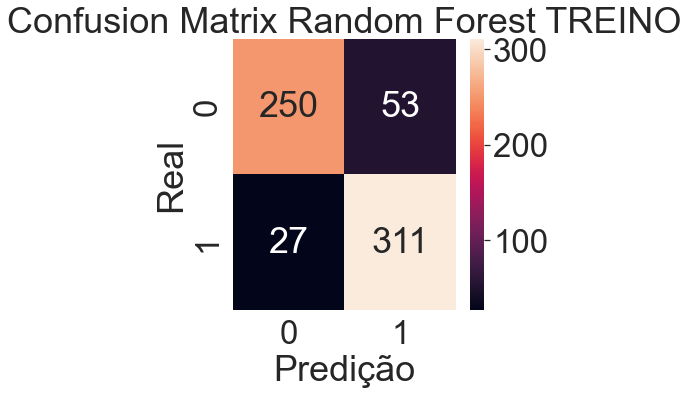


              precision    recall  f1-score   support

           0       0.90      0.83      0.86       303
           1       0.85      0.92      0.89       338

    accuracy                           0.88       641
   macro avg       0.88      0.87      0.87       641
weighted avg       0.88      0.88      0.87       641

Acurácia Random Forest TESTE: 0.8514492753623188


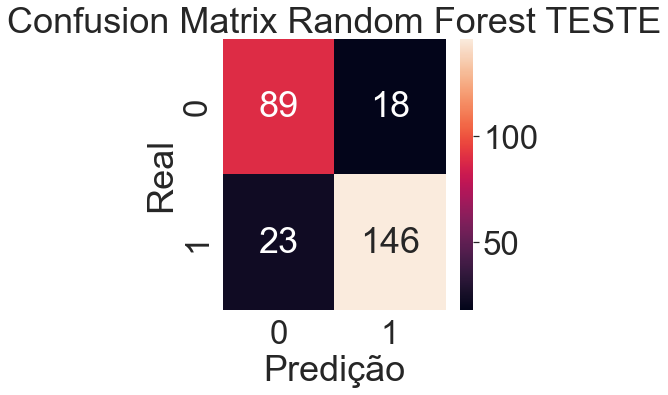


              precision    recall  f1-score   support

           0       0.79      0.83      0.81       107
           1       0.89      0.86      0.88       169

    accuracy                           0.85       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.85      0.85       276



In [148]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_label_encoding_mao_esc, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 42, criterion='entropy', n_estimators=100, max_depth= 4)
random_forest.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_random_forest_treino = random_forest.predict(x_treino)
previsoes_random_forest_teste = random_forest.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Random Forest TREINO: {accuracy_score(y_treino, previsoes_random_forest_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Random Forest TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_random_forest_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_random_forest_treino))

print(f'Acurácia Random Forest TESTE: {accuracy_score(y_teste, previsoes_random_forest_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Random Forest TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_random_forest_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_random_forest_teste))

* Dados com One Hot Encoder e sem Escalonamento 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia Random Forest TREINO: 0.8736349453978159


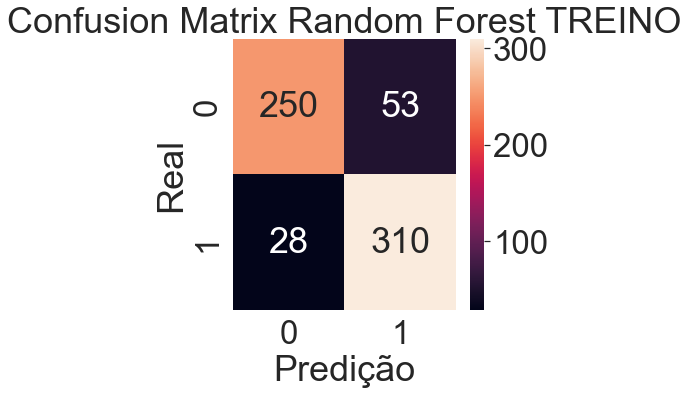


              precision    recall  f1-score   support

           0       0.90      0.83      0.86       303
           1       0.85      0.92      0.88       338

    accuracy                           0.87       641
   macro avg       0.88      0.87      0.87       641
weighted avg       0.88      0.87      0.87       641

Acurácia Random Forest TESTE: 0.8514492753623188


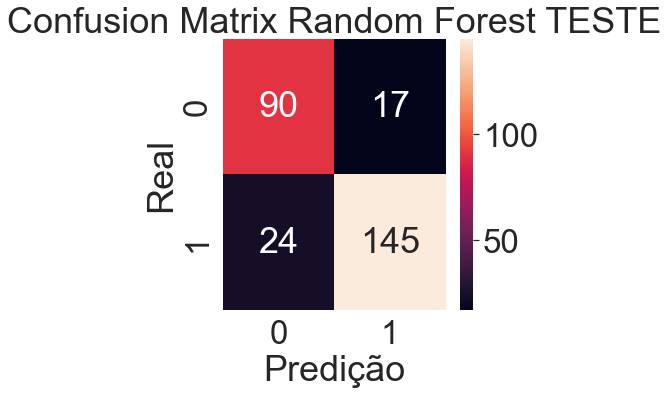


              precision    recall  f1-score   support

           0       0.79      0.84      0.81       107
           1       0.90      0.86      0.88       169

    accuracy                           0.85       276
   macro avg       0.84      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [149]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_one_hot_encoding, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 42, criterion='entropy', n_estimators=100, max_depth= 4)
random_forest.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_random_forest_treino = random_forest.predict(x_treino)
previsoes_random_forest_teste = random_forest.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Random Forest TREINO: {accuracy_score(y_treino, previsoes_random_forest_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Random Forest TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_random_forest_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_random_forest_treino))

print(f'Acurácia Random Forest TESTE: {accuracy_score(y_teste, previsoes_random_forest_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Random Forest TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_random_forest_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_random_forest_teste))

* Dados com One Hot Encoder e com Escalonamento

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia Random Forest TREINO: 0.8736349453978159


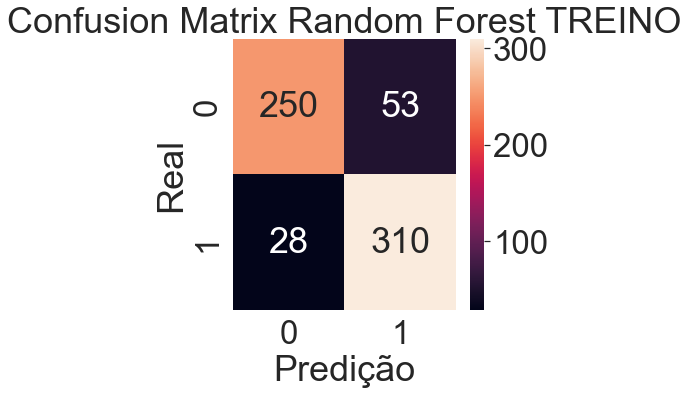


              precision    recall  f1-score   support

           0       0.90      0.83      0.86       303
           1       0.85      0.92      0.88       338

    accuracy                           0.87       641
   macro avg       0.88      0.87      0.87       641
weighted avg       0.88      0.87      0.87       641

Acurácia Random Forest TESTE: 0.8514492753623188


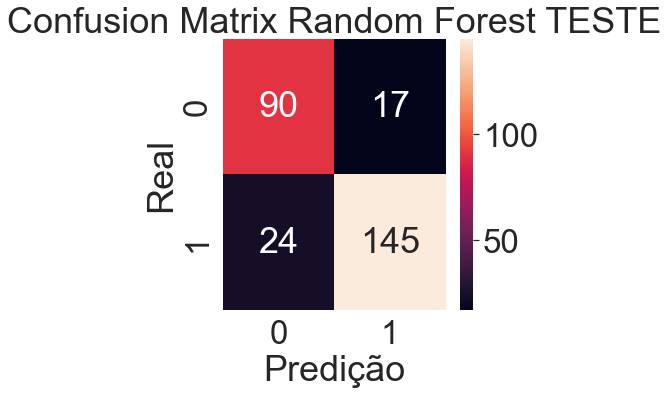


              precision    recall  f1-score   support

           0       0.79      0.84      0.81       107
           1       0.90      0.86      0.88       169

    accuracy                           0.85       276
   macro avg       0.84      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [150]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_one_hot_encoding_esc, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 42, criterion='entropy', n_estimators=100, max_depth= 4)
random_forest.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_random_forest_treino = random_forest.predict(x_treino)
previsoes_random_forest_teste = random_forest.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia Random Forest TREINO: {accuracy_score(y_treino, previsoes_random_forest_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Random Forest TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_random_forest_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_random_forest_treino))

print(f'Acurácia Random Forest TESTE: {accuracy_score(y_teste, previsoes_random_forest_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix Random Forest TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_random_forest_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_random_forest_teste))

> 1. Note que One Hot Encoder piorou a Árvore 

* Validação Cruzada 

In [151]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

# Separando os Dados em Folds 
kfold = KFold(n_splits = 30, shuffle = True, random_state = 42) # 30 grupos, shuffle embaralhamento e random_state elimina aleatoriedade

# Criando o Modelo 

modelo = RandomForestClassifier(random_state = 42, criterion='entropy', n_estimators=100, max_depth= 4)
resultado = cross_val_score(modelo, x_label_encoding_mao, y, cv = kfold)
print('Resultados Cross Validation')
print(resultado)
print()
# Usamos a Média e o Desvio Padrão dos Modelos Calculados 

resultado_random_forest= resultado.mean()*100
print(f'Acurácia Média Random Forest Cross Validation: {resultado_random_forest}')

Resultados Cross Validation
[0.90322581 0.83870968 0.90322581 0.83870968 0.90322581 0.80645161
 0.87096774 0.90322581 0.96774194 0.90322581 0.93548387 0.87096774
 0.93548387 0.90322581 0.87096774 0.80645161 0.80645161 0.76666667
 0.83333333 0.9        0.83333333 0.83333333 0.7        0.86666667
 0.86666667 0.86666667 0.8        0.8        0.76666667 0.86666667]

Acurácia Média Random Forest Cross Validation: 85.55913978494625


## 4.3) Matemática do Gradiente Descendente 

> CONSULTAR:

Repositório de Estatística e Matemática - Módulo 07

https://medium.com/@anwarhermuche/fun%C3%A7%C3%B5es-de-custo-uma-breve-introdu%C3%A7%C3%A3o-5a472599ac1e

https://medium.com/@anwarhermuche/gradiente-descendente-uma-breve-introdu%C3%A7%C3%A3o-3eb13b152a51

https://www.youtube.com/watch?v=joaYDx1HTcA&list=PLtQM10PgmGogjn0cikgWi8wpQUnV6ERkY&index=7&ab_channel=DiogoCortiz

https://www.youtube.com/watch?v=dwxvPurdgpk&list=PLFE-LjWAAP9R4G0WOXWuha4P5cCvw7hGB&index=9&ab_channel=DataICMC


## 4.4) XGBoost 

> 1. CONFERIR : 


https://k3ybladewielder.medium.com/m%C3%A9todos-de-aprendizagem-supervisionada-baseados-em-%C3%A1rvore-2c0580fe8f10

https://medium.com/@aln.deaguiar/xgboost-a-matem%C3%A1tica-passo-a-passo-29d34fa561dc

https://xgboost.readthedocs.io/en/stable/

https://www.youtube.com/watch?v=dwxvPurdgpk&list=PLFE-LjWAAP9R4G0WOXWuha4P5cCvw7hGB&index=9&ab_channel=DataICMC

https://www.youtube.com/watch?v=hVOuCfJxprI&ab_channel=Let%27sData

https://www.youtube.com/watch?v=fG8H-0rb0mY&list=PLwnip85KhroUBuVfAEUz4jE5ejQ5vXf6N&index=3&ab_channel=MarioFilho

https://www.youtube.com/watch?v=vp7sAKlf7FU&list=PLwnip85KhroUBuVfAEUz4jE5ejQ5vXf6N&index=4&ab_channel=MarioFilho

https://www.youtube.com/watch?v=OtD8wVaFm6E&list=PLblh5JKOoLULU0irPgs1SnKO6wqVjKUsQ&ab_channel=StatQuestwithJoshStarmer

### 1) Conceitos Fundamentais

<img src = './img227.png' width = '70%'>

### 2) Fundamentos

<img src = './img228.png' width = '70%'>
<img src = './img229.png' width = '70%'>
<img src = './img230.png' width = '70%'>
<img src = './img231.png' width = '70%'>
<img src = './img232.png' width = '70%'>
<img src = './img233.png' width = '70%'>

### 3) Implementação do Algoritmo XGBoost em Python 

* Dados sem One Hot 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia XGBoost TREINO: 0.9017160686427457


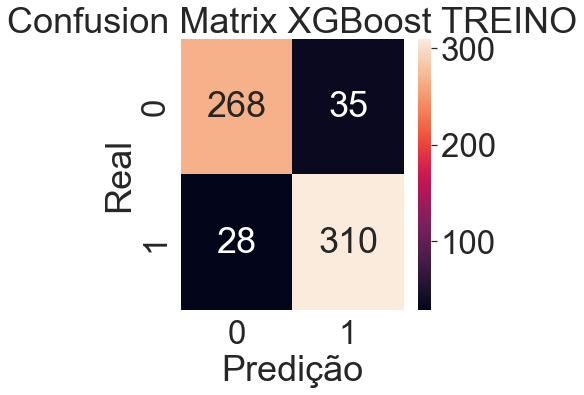


              precision    recall  f1-score   support

           0       0.91      0.88      0.89       303
           1       0.90      0.92      0.91       338

    accuracy                           0.90       641
   macro avg       0.90      0.90      0.90       641
weighted avg       0.90      0.90      0.90       641

Acurácia XGBoost TESTE: 0.8623188405797102


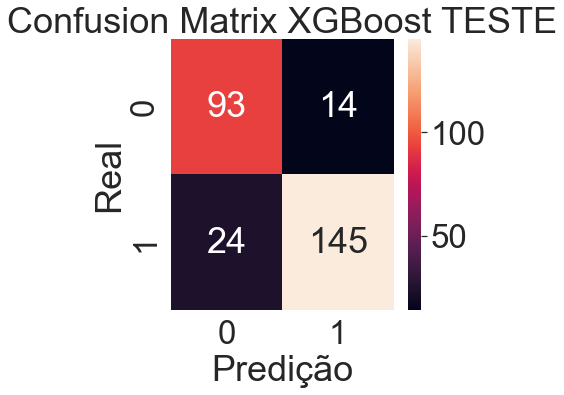


              precision    recall  f1-score   support

           0       0.79      0.87      0.83       107
           1       0.91      0.86      0.88       169

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276



In [166]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_label_encoding_bibilioteca, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from xgboost import XGBClassifier

xg_boost = XGBClassifier(random_state = 42, n_estimators=200, max_depth= 2, learning_rate = 0.05, eval_metric = 'logloss', objective='binary:logistic')
xg_boost.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_xg_boost_treino = xg_boost.predict(x_treino)
previsoes_xg_boost_teste = xg_boost.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia XGBoost TREINO: {accuracy_score(y_treino, previsoes_xg_boost_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix XGBoost TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_xg_boost_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_xg_boost_treino))

print(f'Acurácia XGBoost TESTE: {accuracy_score(y_teste, previsoes_xg_boost_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix XGBoost TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_xg_boost_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_xg_boost_teste))

* Dados com One Hot 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

Acurácia XGBoost TREINO: 0.9079563182527302


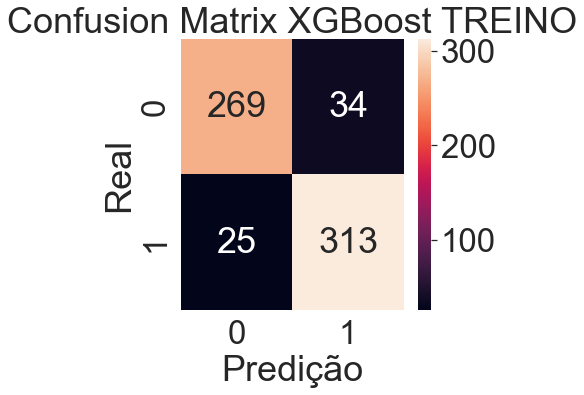


              precision    recall  f1-score   support

           0       0.91      0.89      0.90       303
           1       0.90      0.93      0.91       338

    accuracy                           0.91       641
   macro avg       0.91      0.91      0.91       641
weighted avg       0.91      0.91      0.91       641

Acurácia XGBoost TESTE: 0.8768115942028986


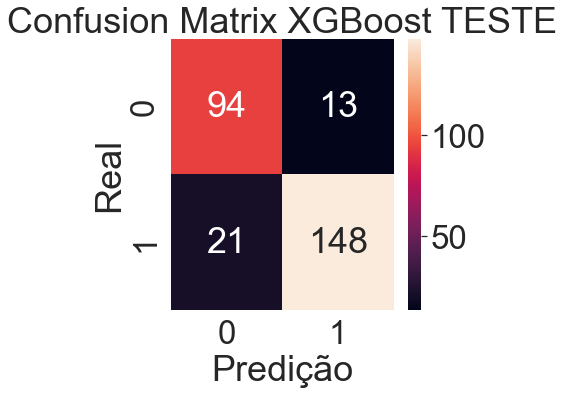


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.92      0.88      0.90       169

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



In [167]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_one_hot_encoding, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from xgboost import XGBClassifier

xg_boost = XGBClassifier(random_state = 42, n_estimators=200, max_depth= 2, learning_rate = 0.05, eval_metric = 'logloss', objective='binary:logistic')
xg_boost.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_xg_boost_treino = xg_boost.predict(x_treino)
previsoes_xg_boost_teste = xg_boost.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia XGBoost TREINO: {accuracy_score(y_treino, previsoes_xg_boost_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix XGBoost TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_xg_boost_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_xg_boost_treino))

print(f'Acurácia XGBoost TESTE: {accuracy_score(y_teste, previsoes_xg_boost_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix XGBoost TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_xg_boost_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_xg_boost_teste))

* Validação Cruzada

In [169]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

# Separando os Dados em Folds 
kfold = KFold(n_splits = 30, shuffle = True, random_state = 42) # 30 grupos, shuffle embaralhamento e random_state elimina aleatoriedade

# Criando o Modelo 

modelo = XGBClassifier(random_state = 42, n_estimators=200, max_depth= 2, learning_rate = 0.05, eval_metric = 'logloss', objective='binary:logistic')
resultado = cross_val_score(modelo, x_label_encoding_mao, y, cv = kfold)
print('Resultados Cross Validation')
print(resultado)
print()
# Usamos a Média e o Desvio Padrão dos Modelos Calculados 

resultado_xg_boost= resultado.mean()*100
print(f'Acurácia Média XGBoost Cross Validation: {resultado_xg_boost}')

Resultados Cross Validation
[0.87096774 0.83870968 0.87096774 0.90322581 0.90322581 0.87096774
 0.93548387 0.96774194 0.93548387 0.87096774 0.93548387 0.90322581
 0.93548387 0.90322581 0.87096774 0.83870968 0.80645161 0.83333333
 0.83333333 0.9        0.83333333 0.83333333 0.73333333 0.86666667
 0.83333333 0.86666667 0.83333333 0.8        0.83333333 0.83333333]

Acurácia Média XGBoost Cross Validation: 86.64874551971324


## 4.5) Catboost

> 1. CONFERIR : 

https://k3ybladewielder.medium.com/m%C3%A9todos-de-aprendizagem-supervisionada-baseados-em-%C3%A1rvore-2c0580fe8f10

https://medium.com/data-hackers/entendendo-catboost-um-guia-quase-definitivo-b28bc153a78#:~:text=O%20CatBoost%20executa%20o%20gradient,para%20cada%20ponto%20de%20dados.&text=O%20CatBoost%20calcula%20o%20res%C3%ADduo,data%20points%20at%C3%A9%20aquele%20momento.

https://catboost.ai/en/docs/

https://www.youtube.com/watch?v=hDP9DZvz8us&ab_channel=Eduardo%7CCi%C3%AAnciadosDados

https://www.youtube.com/watch?v=8o0e-r0B5xQ&ab_channel=PyData

### 1) Conceitos Fundamentais

<img src = './img281.png' width = '70%'>
<img src = './img282.png' width = '70%'>
<img src = './img280.png' width = '70%'>

### 2) Fundamentos



### 3) Implementação do Algoritmo CatBoost em Python 

* Dados sem One Hot Encoder 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

0:	learn: 0.8315133	total: 1.03ms	remaining: 205ms
1:	learn: 0.8393136	total: 2.07ms	remaining: 205ms
2:	learn: 0.8377535	total: 3.07ms	remaining: 201ms
3:	learn: 0.8361934	total: 4.08ms	remaining: 200ms
4:	learn: 0.8283931	total: 5.09ms	remaining: 199ms
5:	learn: 0.8377535	total: 6.17ms	remaining: 200ms
6:	learn: 0.8408736	total: 7.71ms	remaining: 213ms
7:	learn: 0.8424337	total: 8.88ms	remaining: 213ms
8:	learn: 0.8408736	total: 9.93ms	remaining: 211ms
9:	learn: 0.8408736	total: 11ms	remaining: 208ms
10:	learn: 0.8439938	total: 12ms	remaining: 206ms
11:	learn: 0.8549142	total: 13ms	remaining: 204ms
12:	learn: 0.8502340	total: 14ms	remaining: 201ms
13:	learn: 0.8517941	total: 15ms	remaining: 199ms
14:	learn: 0.8517941	total: 15.9ms	remaining: 197ms
15:	learn: 0.8564743	total: 17ms	remaining: 195ms
16:	learn: 0.8549142	total: 18ms	remaining: 194ms
17:	learn: 0.8549142	total: 19ms	remaining: 192ms
18

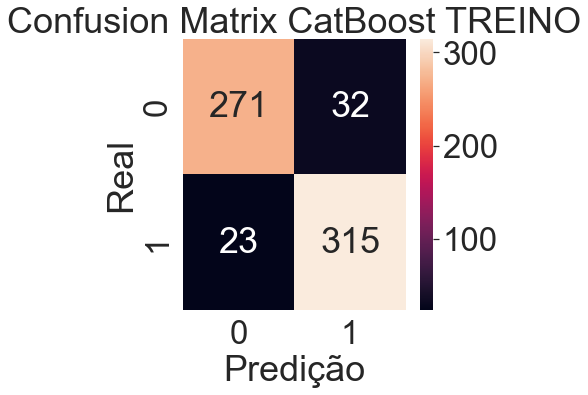


              precision    recall  f1-score   support

           0       0.92      0.89      0.91       303
           1       0.91      0.93      0.92       338

    accuracy                           0.91       641
   macro avg       0.91      0.91      0.91       641
weighted avg       0.91      0.91      0.91       641

Acurácia CatBoost TESTE: 0.8768115942028986


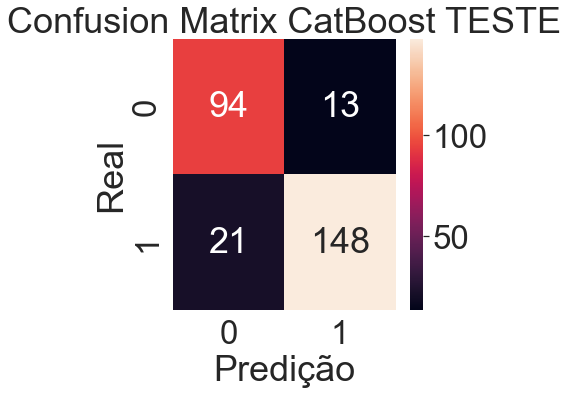


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.92      0.88      0.90       169

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



In [180]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_label_encoding_bibilioteca, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from catboost import CatBoostClassifier

catboost = CatBoostClassifier(random_state = 42, iterations=200, depth= 3, learning_rate = 0.05, eval_metric = 'Accuracy', task_type = 'CPU')
catboost.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_catboost_treino = catboost.predict(x_treino)
previsoes_catboost_teste = catboost.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia CatBoost TREINO: {accuracy_score(y_treino, previsoes_catboost_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix CatBoost TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_catboost_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_catboost_treino))

print(f'Acurácia CatBoost TESTE: {accuracy_score(y_teste, previsoes_catboost_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix CatBoost TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_catboost_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_catboost_teste))

* Dados com One Hot Encoder 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

0:	learn: 0.8221529	total: 1.02ms	remaining: 203ms
1:	learn: 0.8221529	total: 2.1ms	remaining: 208ms
2:	learn: 0.8221529	total: 3.14ms	remaining: 206ms
3:	learn: 0.8283931	total: 4.2ms	remaining: 206ms
4:	learn: 0.8205928	total: 5.25ms	remaining: 205ms
5:	learn: 0.8221529	total: 6.32ms	remaining: 204ms
6:	learn: 0.8283931	total: 7.33ms	remaining: 202ms
7:	learn: 0.8221529	total: 8.36ms	remaining: 201ms
8:	learn: 0.8221529	total: 9.4ms	remaining: 199ms
9:	learn: 0.8237129	total: 10.4ms	remaining: 199ms
10:	learn: 0.8237129	total: 11.5ms	remaining: 198ms
11:	learn: 0.8237129	total: 12.5ms	remaining: 196ms
12:	learn: 0.8252730	total: 13.6ms	remaining: 195ms
13:	learn: 0.8455538	total: 14.6ms	remaining: 195ms
14:	learn: 0.8517941	total: 15.7ms	remaining: 194ms
15:	learn: 0.8533541	total: 16.7ms	remaining: 193ms
16:	learn: 0.8486739	total: 17.9ms	remaining: 193ms
17:	learn: 0.8517941	total: 19ms	remainin

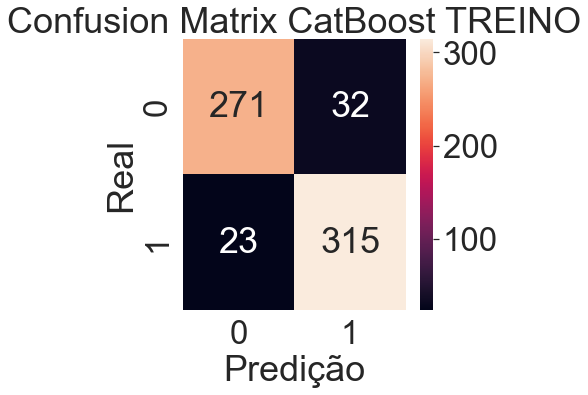


              precision    recall  f1-score   support

           0       0.92      0.89      0.91       303
           1       0.91      0.93      0.92       338

    accuracy                           0.91       641
   macro avg       0.91      0.91      0.91       641
weighted avg       0.91      0.91      0.91       641

Acurácia CatBoost TESTE: 0.8768115942028986


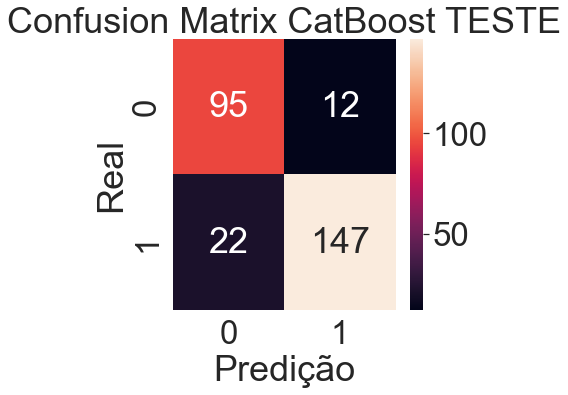


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       107
           1       0.92      0.87      0.90       169

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



In [181]:
# Separação entre Dados de Treino e Teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_one_hot_encoding, y, test_size = 0.3, random_state = 42)

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from catboost import CatBoostClassifier

catboost = CatBoostClassifier(random_state = 42, iterations=200, depth= 3, learning_rate = 0.05, eval_metric = 'Accuracy', task_type = 'CPU')
catboost.fit(x_treino, y_treino)

# Avaliação do Algoritmo

previsoes_catboost_treino = catboost.predict(x_treino)
previsoes_catboost_teste = catboost.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia CatBoost TREINO: {accuracy_score(y_treino, previsoes_catboost_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix CatBoost TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_catboost_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_catboost_treino))

print(f'Acurácia CatBoost TESTE: {accuracy_score(y_teste, previsoes_catboost_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix CatBoost TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_catboost_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_catboost_teste))

* Utilizando as Vatangens do CatBoost 

Tamanho X_Treino: 641
Tamanho X_Teste: 276

Tamanho Y_Treino: 641
Tamanho Y_Teste: 276

0:	learn: 0.8252730	test: 0.8224638	best: 0.8224638 (0)	total: 16.3ms	remaining: 3.24s
1:	learn: 0.8237129	test: 0.7934783	best: 0.8224638 (0)	total: 37.8ms	remaining: 3.74s
2:	learn: 0.8330733	test: 0.8079710	best: 0.8224638 (0)	total: 57.8ms	remaining: 3.79s
3:	learn: 0.8268331	test: 0.8043478	best: 0.8224638 (0)	total: 76.9ms	remaining: 3.77s
4:	learn: 0.8424337	test: 0.8043478	best: 0.8224638 (0)	total: 95.2ms	remaining: 3.71s
5:	learn: 0.8471139	test: 0.8079710	best: 0.8224638 (0)	total: 114ms	remaining: 3.69s
6:	learn: 0.8424337	test: 0.8043478	best: 0.8224638 (0)	total: 133ms	remaining: 3.65s
7:	learn: 0.8486739	test: 0.8079710	best: 0.8224638 (0)	total: 150ms	remaining: 3.61s
8:	learn: 0.8502340	test: 0.8043478	best: 0.8224638 (0)	total: 168ms	remaining: 3.57s
9:	learn: 0.8486739	test: 0.8079710	best: 0.8224638 (0)	total: 186ms	remaining: 3.53s
10:	learn: 0.8517941	test: 0.8188406	best: 0.82

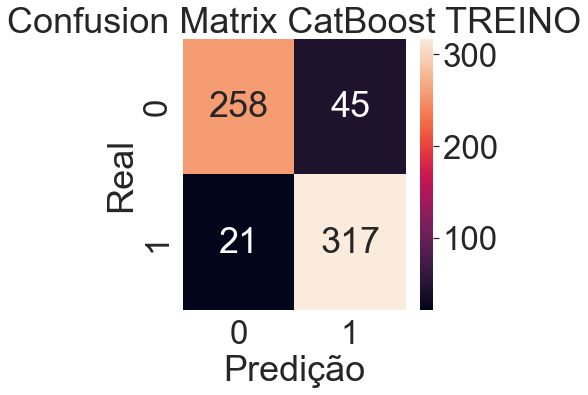


              precision    recall  f1-score   support

           0       0.92      0.85      0.89       303
           1       0.88      0.94      0.91       338

    accuracy                           0.90       641
   macro avg       0.90      0.89      0.90       641
weighted avg       0.90      0.90      0.90       641

Acurácia CatBoost TESTE: 0.8876811594202898


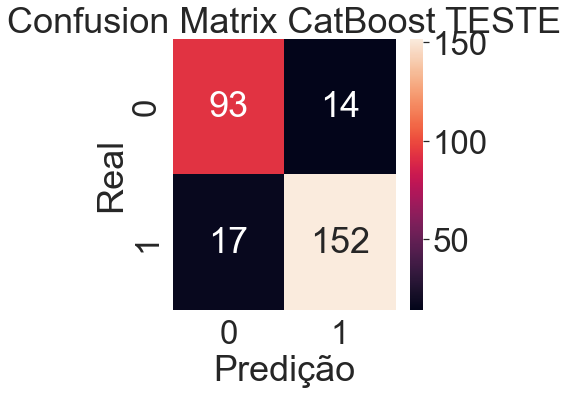


              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.92      0.90      0.91       169

    accuracy                           0.89       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.89      0.89      0.89       276



In [184]:
# Separação entre Dados de Treino e Teste

x_catboost = df.iloc[:, 0:11]
y_catboost = df.iloc[:, 11]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_catboost, y_catboost, test_size = 0.3, random_state = 42)
categoricas = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

print(f'Tamanho X_Treino: {x_treino.shape[0]}')
print(f'Tamanho X_Teste: {x_teste.shape[0]}')
print()
print(f'Tamanho Y_Treino: {y_treino.shape[0]}')
print(f'Tamanho Y_Teste: {y_teste.shape[0]}')
print()

# Treinamento do Algoritmo

from catboost import CatBoostClassifier

catboost = CatBoostClassifier(random_state = 42, iterations=200, depth= 5, learning_rate = 0.05, eval_metric = 'Accuracy', task_type = 'CPU')
catboost.fit(x_treino, y_treino, cat_features=categoricas, eval_set = (x_teste, y_teste))

# Avaliação do Algoritmo

previsoes_catboost_treino = catboost.predict(x_treino)
previsoes_catboost_teste = catboost.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Acurácia CatBoost TREINO: {accuracy_score(y_treino, previsoes_catboost_treino)}')
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix CatBoost TREINO')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_treino, previsoes_catboost_treino), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_treino, previsoes_catboost_treino))

print(f'Acurácia CatBoost TESTE: {accuracy_score(y_teste, previsoes_catboost_teste)}')

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix CatBoost TESTE')
sns.set(font_scale = 3)
sns.heatmap(confusion_matrix(y_teste, previsoes_catboost_teste), annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()
print()
print(classification_report(y_teste, previsoes_catboost_teste))

* Validação Cruzada 

In [185]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

# Separando os Dados em Folds 
kfold = KFold(n_splits = 30, shuffle = True, random_state = 42) # 30 grupos, shuffle embaralhamento e random_state elimina aleatoriedade

# Criando o Modelo 
# Neste caso, não podemos utilizar a separação de Features Categóricas na Validação Cruzada

modelo = CatBoostClassifier(random_state = 42, iterations=200, depth= 5, learning_rate = 0.05, eval_metric = 'Accuracy', task_type = 'CPU')
resultado = cross_val_score(modelo, x_label_encoding_mao, y, cv = kfold)
print('Resultados Cross Validation')
print(resultado)
print()
# Usamos a Média e o Desvio Padrão dos Modelos Calculados 

resultado_catboost= resultado.mean()*100
print(f'Acurácia Média CatBoost Cross Validation: {resultado_catboost}')

0:	learn: 0.8374718	total: 2.05ms	remaining: 409ms
1:	learn: 0.8397291	total: 3.67ms	remaining: 363ms
2:	learn: 0.8510158	total: 5.85ms	remaining: 384ms
3:	learn: 0.8498871	total: 7.75ms	remaining: 380ms
4:	learn: 0.8589165	total: 9.27ms	remaining: 362ms
5:	learn: 0.8555305	total: 12.2ms	remaining: 396ms
6:	learn: 0.8577878	total: 14.3ms	remaining: 394ms
7:	learn: 0.8623025	total: 16.3ms	remaining: 392ms
8:	learn: 0.8679458	total: 18.3ms	remaining: 389ms
9:	learn: 0.8735892	total: 20.8ms	remaining: 395ms
10:	learn: 0.8702032	total: 22.8ms	remaining: 391ms
11:	learn: 0.8724605	total: 24.6ms	remaining: 385ms
12:	learn: 0.8735892	total: 26.4ms	remaining: 380ms
13:	learn: 0.8702032	total: 28.5ms	remaining: 379ms
14:	learn: 0.8690745	total: 29.8ms	remaining: 368ms
15:	learn: 0.8735892	total: 31.4ms	remaining: 362ms
16:	learn: 0.8747178	total: 33.1ms	remaining: 356ms
17:	learn: 0.8758465	total: 34.6ms	remaining: 350ms
18:	learn: 0.8769752	total: 36.2ms	remaining: 345ms
19:	learn: 0.8781038	t

# <font color='red' style='font-size: 40px;'>5.0 Salvando Dados e Simulando Deploy  </font>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    

### 5.1) Salvando as Variáveis Preditoras e Variável Predita 

In [189]:
previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [188]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [190]:
np.savetxt('previsores.csv', previsores, delimiter = ',')
np.savetxt('alvo.csv', alvo, delimiter = ',')

### 5.2) Salvando o Modelo de Machine Learning Escolhido 

In [200]:
import pandas as pd 
import numpy as np 
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregando os Dados
previsores = pd.read_csv('previsores.csv', sep = ',', header = None)
alvo = pd.read_csv('alvo.csv', sep = ',', header = None)
previsores = previsores.values 
alvo = alvo.iloc[:, 0].values

# Carregando o Classificador CatBoostClassifier
catboost = CatBoostClassifier(random_state = 42, iterations=200, depth= 5, learning_rate = 0.05, eval_metric = 'Accuracy', task_type = 'CPU')
catboost.fit(previsores, alvo)

0:	learn: 0.8386041	total: 1.5ms	remaining: 298ms
1:	learn: 0.8364231	total: 2.7ms	remaining: 268ms
2:	learn: 0.8451472	total: 4.08ms	remaining: 268ms
3:	learn: 0.8495093	total: 5.49ms	remaining: 269ms
4:	learn: 0.8462377	total: 6.9ms	remaining: 269ms
5:	learn: 0.8560523	total: 8.26ms	remaining: 267ms
6:	learn: 0.8625954	total: 9.79ms	remaining: 270ms
7:	learn: 0.8604144	total: 11.4ms	remaining: 275ms
8:	learn: 0.8615049	total: 12.8ms	remaining: 272ms
9:	learn: 0.8582334	total: 14.3ms	remaining: 271ms
10:	learn: 0.8604144	total: 15.7ms	remaining: 270ms
11:	learn: 0.8658670	total: 17.1ms	remaining: 268ms
12:	learn: 0.8658670	total: 18.5ms	remaining: 266ms
13:	learn: 0.8647764	total: 20.2ms	remaining: 268ms
14:	learn: 0.8680480	total: 21.7ms	remaining: 267ms
15:	learn: 0.8691385	total: 23.2ms	remaining: 267ms
16:	learn: 0.8745911	total: 24.6ms	remaining: 265ms
17:	learn: 0.8745911	total: 26.1ms	remaining: 264ms
18:	learn: 0.8745911	total: 27.5ms	remaining: 262ms
19:	learn: 0.8724100	tota

### 5.3) Simulação de Novos Pacientes 

In [203]:
paciente1 = [40, 0, 1, 140, 289, 0, 0, 172, 0, 0, 0]
paciente2 = [48, 1, 3, 138, 214, 0, 0, 108, 1, 1.5, 1]

resultado = catboost.predict(paciente1)

if resultado == 1:
    print('O Paciente 1 POSSUI tendência de problemas cardíacos')

else: 
    print('O Paciente 1 NÃO POSSUI tendência de problemas cardíacos')

resultado = catboost.predict(paciente2)

if resultado == 1:
    print('O Paciente 2 POSSUI tendência de problemas cardíacos')

else: 
    print('O Paciente 2 NÃO POSSUI tendência de problemas cardíacos')

O Paciente 1 NÃO POSSUI tendência de problemas cardíacos
O Paciente 2 POSSUI tendência de problemas cardíacos


# <font color='red' style='font-size: 40px;'>6.0 Previsão de Sobrevivência Titanic </font>
<hr style='border: 2px solid red;'>

> CONSULTAR: 

https://www.youtube.com/watch?v=s2drgo58G2c&list=PLwnip85KhroXnYqk_ske2o3TgnQrLbMU6&index=9&ab_channel=MarioFilho

# <font color='red' style='font-size: 40px;'>7.0 Previsão de Churn </font>
<hr style='border: 2px solid red;'>

> CONSULTAR: 

https://www.flai.com.br/juscudilio/parte-i-como-aplicar-machine-learning-para-reduzir-o-churn/<

https://www.flai.com.br/juscudilio/parte-ii-como-aplicar-machine-learning-para-reduzir-o-churn/<

https://www.flai.com.br/juscudilio/parte-iii-como-utilizar-modelos-de-machine-learning-para-reduzir-o-churn/<




# <font color='red' style='font-size: 40px;'>8.0 Análise de Risco de Crédito </font>
<hr style='border: 2px solid red;'>

> CONSULTAR: 

https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [ ]:
# <font color='red' style='font-size: 40px;'>9.0 Previsão de Venda de Seguros</font>
<hr style='border: 2px solid red;'>

> CONSULTAR: 

https://www.kaggle.com/datasets/laotse/credit-risk-dataset